# Piotr Nietupski = Bootcamp projekt zaliczeniowy. 
# Temat 1 - Przewidywanie ceny domów 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Przed wczytaniem zmienione zostały nazwy zmiennych, które miały w nazwach kropki (zamiana z kropek na podkreślniki)


FILENAME = r'ames2000_NAfix.csv'

ames = pd.read_csv(FILENAME, encoding='utf-8')
#2000 obserwacji - mniej niż w opisie danych - więc dodatkowo zostały sprawdzone tablice częstości dla zmiennych nominalnych

In [4]:
from __future__ import print_function
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

In [5]:
#Spojrzenie na dane
ames.head(5)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,9,2006,New,Partial,342643


In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MS_SubClass      2000 non-null   int64 
 1   MS_Zoning        2000 non-null   object
 2   Lot_Frontage     2000 non-null   object
 3   Lot_Area         2000 non-null   int64 
 4   Street           2000 non-null   object
 5   Alley            2000 non-null   object
 6   Lot_Shape        2000 non-null   object
 7   Land_Contour     2000 non-null   object
 8   Utilities        2000 non-null   object
 9   Lot_Config       2000 non-null   object
 10  Land_Slope       2000 non-null   object
 11  Neighborhood     2000 non-null   object
 12  Condition_1      2000 non-null   object
 13  Condition_2      2000 non-null   object
 14  Bldg_Type        2000 non-null   object
 15  House_Style      2000 non-null   object
 16  Overall_Qual     2000 non-null   int64 
 17  Overall_Cond     2000 non-null   

In [8]:
# Zmienne które posiadają nulle
null_counts = ames.isnull().sum()
null_counts[null_counts > 0]

Mas_Vnr_Type      16
Bsmt_Qual          1
Bsmt_Cond          1
Bsmt_Exposure      3
BsmtFin_Type_1     1
BsmtFin_Type_2     2
Garage_Finish      2
Garage_Qual        1
Garage_Cond        1
dtype: int64

In [9]:
# Ale nie wiemy, czy jakieś zmienne nie będą miały sensu

__Analiza listy obserwacji__
W poleceniu projektu jest podana informacja o NIE usuwaniu obserwacji ze zbioru. Jednak biznesowa analiza zmiennej MS Zoning 
skłoniła do odrzucenia obserwacji, które nie spełniają intuicyjnie definicji domu. Są to 4 kategorie
   A	Agriculture
    C	Commercial
     FV	Floating Village Residential
    I	Industrial
Zasasdne wydaje się wykluczenie tych obserwacji ze zbioru

In [ ]:
#MS Zoning (Nominal): Identifies the general zoning classification of the sale. Zmienna MS_Zoning - 

print(ames.loc[:,"MS_Zoning"].describe())
print(ames.MS_Zoning.value_counts())


In [ ]:
cat_to_apply=['RL','RM','RH']

In [ ]:
ames=ames[ames.MS_Zoning.isin(cat_to_apply)]

In [ ]:
ames=ames.reset_index() #1881 obserwacji

In [ ]:
ames.drop(['index'], axis=1,inplace=True)

In [ ]:
ames['MS_Zoning'] = pd.Categorical(ames['MS_Zoning'])

In [ ]:
ames.info()

__Zmiany typów danych - wstępna analiza zmiennych__

In [17]:
# MS SubClass (Nominal): Identifies the type of dwelling(rodzaj lokalu) involved in the sale.	 zamieniamy na tekstową
ames['MS_SubClass'] = pd.Categorical(ames['MS_SubClass'])
ames.MS_SubClass.value_counts()

20     726
60     356
50     193
120    105
70      87
30      82
90      80
80      76
160     52
190     42
85      36
180     15
75      14
45      14
40       3
150      1
Name: MS_SubClass, dtype: int64

In [18]:
#Zmienna Lot_Frontage jest w rzeczywistości zmienna numeryczną - odległość od ulicy do domu - założone zostało że none oznacza 0

print(ames.loc[:,"Lot_Frontage"].describe())
#318 wartości none - coś z nimi trzeba zrobić - zamiana na 0
ames.Lot_Frontage[ames.Lot_Frontage == 'None'] = 0 
print(ames.Lot_Frontage.value_counts())
ames["Lot_Frontage"] = ames.Lot_Frontage.astype(float)
#ames.hist(column='Lot_Frontage')
print(ames.loc[:,"Lot_Frontage"].describe())

count     1882
unique     119
top       None
freq       318
Name: Lot_Frontage, dtype: object
0      318
60     175
80      97
70      94
50      80
      ... 
152      1
112      1
153      1
111      1
136      1
Name: Lot_Frontage, Length: 119, dtype: int64
count    1882.000000
mean       58.162593
std        33.863065
min         0.000000
25%        45.000000
50%        63.000000
75%        78.750000
max       313.000000
Name: Lot_Frontage, dtype: float64


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


count      1882.000000
mean      10469.856004
std        8947.813328
min        1300.000000
25%        7678.000000
50%        9600.000000
75%       11659.250000
max      215245.000000
Name: Lot_Area, dtype: float64
count     1878.000000
mean     10143.884452
std       5246.875317
min       1300.000000
25%       7671.000000
50%       9595.500000
75%      11645.000000
max      63887.000000
Name: Lot_Area, dtype: float64


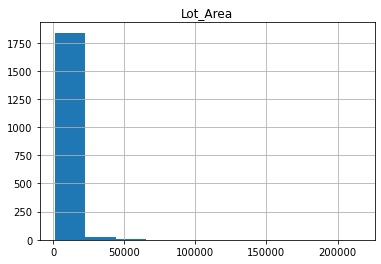

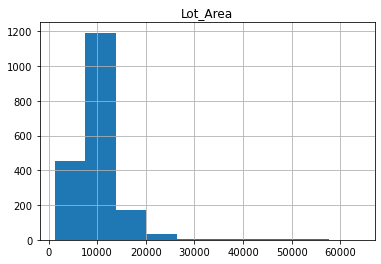

In [19]:
print(ames.loc[:,"Lot_Area"].describe())
ames.hist(column='Lot_Area')
x = ames.query('Lot_Area<100000')
x.hist(column='Lot_Area')
print(x.loc[:,"Lot_Area"].describe())

In [20]:
#Zmienna Street Type of road access to property, raczej mało przydatna, gdyż, przyjmuje tylko 2 wartosci

print(ames.loc[:,"Street"].describe())
print(ames.Street.value_counts())


count     1882
unique       2
top       Pave
freq      1877
Name: Street, dtype: object
Pave    1877
Grvl       5
Name: Street, dtype: int64


In [21]:
#Zmienna Alley  Type of alley access to property - troche wiecej informacji, 3wartosci , dużo none - ale to nie missing

print(ames.loc[:,"Alley"].describe())
print(ames.Alley.value_counts())

count     1882
unique       3
top       None
freq      1782
Name: Alley, dtype: object
None    1782
Grvl      85
Pave      15
Name: Alley, dtype: int64


In [22]:
#Lot Shape (Ordinal): General shape of property - moznaby to zmienic na factor order

print(ames.loc[:,"Lot_Shape"].describe())
print(ames.Lot_Shape.value_counts())

ames['Lot_Shape'] = ames['Lot_Shape'].astype('category')
print(ames.loc[:,"Lot_Shape"].describe())

ames['Lot_Shape']=ames['Lot_Shape'].cat.reorder_categories(['IR3','IR2','IR1','Reg'])#kolejnosc od najgorszej do najlepszej
print(ames.loc[:,"Lot_Shape"].describe())

count     1882
unique       4
top        Reg
freq      1187
Name: Lot_Shape, dtype: object
Reg    1187
IR1     630
IR2      52
IR3      13
Name: Lot_Shape, dtype: int64
count     1882
unique       4
top        Reg
freq      1187
Name: Lot_Shape, dtype: object
count     1882
unique       4
top        Reg
freq      1187
Name: Lot_Shape, dtype: object


In [23]:
#Land Contour (Nominal): Flatness of the property
print(ames.loc[:,"Land_Contour"].describe())
print(ames.Land_Contour.value_counts())


count     1882
unique       4
top        Lvl
freq      1696
Name: Land_Contour, dtype: object
Lvl    1696
Bnk      74
HLS      73
Low      39
Name: Land_Contour, dtype: int64


In [24]:
#Zmienna Utilities - tylko jedna wartość zmiennej - odrzucamy
ames.Utilities.value_counts()
ames.drop(['Utilities'], axis=1,inplace=True)

In [25]:
#Lot Config (Nominal): Lot configuration
print(ames.loc[:,"Lot_Config"].describe())
print(ames.Lot_Config.value_counts())

count       1882
unique         5
top       Inside
freq        1357
Name: Lot_Config, dtype: object
Inside     1357
Corner      329
CulDSac     127
FR2          56
FR3          13
Name: Lot_Config, dtype: int64


In [26]:
#Land Slope (Ordinal): Slope of property
print(ames.loc[:,"Land_Slope"].describe())
print(ames.Land_Slope.value_counts())
#Zamiana na ordinal category

ames['Land_Slope'] = ames['Land_Slope'].astype('category')
print(ames.loc[:,"Land_Slope"].describe())
ames['Land_Slope']=ames['Land_Slope'].cat.reorder_categories(['Sev','Mod','Gtl'])


count     1882
unique       3
top        Gtl
freq      1785
Name: Land_Slope, dtype: object
Gtl    1785
Mod      83
Sev      14
Name: Land_Slope, dtype: int64
count     1882
unique       3
top        Gtl
freq      1785
Name: Land_Slope, dtype: object


In [27]:
#Neighborhood (Nominal): Physical locations within Ames city limits (map available)
print(ames.loc[:,"Neighborhood"].describe())
print(ames.Neighborhood.value_counts())


count        1882
unique         27
top       Nonemes
freq          303
Name: Neighborhood, dtype: object
Nonemes    303
CollgCr    192
OldTown    166
Edwards    134
Sawyer     107
NridgHt    104
Gilbert     99
NWAmes      92
SawyerW     80
BrkSide     78
Crawfor     73
Mitchel     71
NoRidge     56
IDOTRR      49
Timber      48
StoneBr     38
ClearCr     33
Somerst     31
SWISU       30
MeadowV     28
Veenker     15
Blmngtn     14
NPkVill     14
BrDale      13
Blueste      8
Greens       5
GrnHill      1
Name: Neighborhood, dtype: int64


In [28]:
#Condition 1 (Nominal): Proximity to various conditions
    
print(ames.loc[:,"Condition_1"].describe())
print(ames.Condition_1.value_counts())

count     1882
unique       9
top       Norm
freq      1609
Name: Condition_1, dtype: object
Norm      1609
Feedr      111
Artery      60
RRAn        31
PosN        25
RRAe        20
PosA        14
RRNn         7
RRNe         5
Name: Condition_1, dtype: int64


In [29]:
#Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

print(ames.loc[:,"Condition_2"].describe())
print(ames.Condition_2.value_counts())


count     1882
unique       7
top       Norm
freq      1863
Name: Condition_2, dtype: object
Norm      1863
Feedr        9
PosN         3
Artery       3
RRNn         2
RRAn         1
PosA         1
Name: Condition_2, dtype: int64


In [30]:
#Bldg Type (Nominal): Type of dwellin

print(ames.loc[:,"Bldg_Type"].describe())
print(ames.Bldg_Type.value_counts())


count     1882
unique       5
top       1Fam
freq      1592
Name: Bldg_Type, dtype: object
1Fam      1592
TwnhsE     120
Duplex      80
Twnhs       47
2fmCon      43
Name: Bldg_Type, dtype: int64


In [31]:
#House Style (Nominal): Style of dwelling

print(ames.loc[:,"House_Style"].describe())
print(ames.House_Style.value_counts())


count       1882
unique         8
top       1Story
freq         967
Name: House_Style, dtype: object
1Story    967
2Story    527
1.5Fin    212
SLvl       83
SFoyer     64
1.5Unf     13
2.5Unf     13
2.5Fin      3
Name: House_Style, dtype: int64


In [32]:
# Overall Qual (Ordinal): Rates the overall material and finish of the house

print(ames.loc[:,"Overall_Qual"].describe())
print(ames.Overall_Qual.value_counts())
#Zamiana na ordinal category - chce zamienic liczbe, ale cos nie moge

ames['Overall_Qual'] = ames['Overall_Qual'].astype('category')


#print(ames.loc[:,"Overall_Qual"].describe())
#ames['Overall_Qual']=ames['Overall_Qual'].cat.reorder_categories(['10', '9','8','7','6','5','4','3','2','1'])
#print(ames.loc[:,"Overall_Qual"].describe())

count    1882.000000
mean        6.033475
std         1.366200
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall_Qual, dtype: float64
5     575
6     487
7     346
8     221
4     145
9      65
3      22
10     12
2       8
1       1
Name: Overall_Qual, dtype: int64


In [33]:
# Overall Cond (Ordinal): Rates the overall condition of the house

print(ames.Overall_Cond.value_counts())
ames['Overall_Cond'] = ames['Overall_Cond'].astype('category')
print(ames.loc[:,"Overall_Cond"].describe())

5    1007
6     376
7     265
8      99
4      72
3      29
9      26
2       5
1       3
Name: Overall_Cond, dtype: int64
count     1882
unique       9
top          5
freq      1007
Name: Overall_Cond, dtype: int64


count    1882.000000
mean     1969.654623
std        29.519198
min      1872.000000
25%      1953.000000
50%      1971.000000
75%      1998.000000
max      2010.000000
Name: Year_Built, dtype: float64
count    1882.000000
mean       40.345377
std        29.519198
min         0.000000
25%        12.000000
50%        39.000000
75%        57.000000
max       138.000000
Name: age, dtype: float64


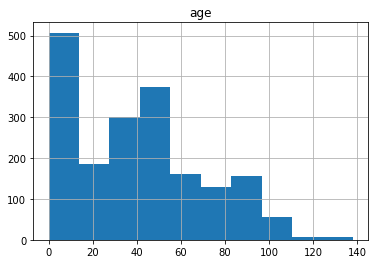

In [34]:
# Year Built (Discrete): Original construction date - zmienna datowa, formatuje ją na wiek. - 2010 rok jako bazowy

print(ames.loc[:,"Year_Built"].describe())
#wiek
ames['age'] = (2010-ames['Year_Built'])

print(ames.loc[:,"age"].describe())
ames.hist(column='age')
ames.drop(['Year_Built'], axis=1,inplace=True)

count    1882.000000
mean     1983.131775
std        20.745353
min      1950.000000
25%      1964.000000
50%      1990.000000
75%      2003.000000
max      2010.000000
Name: Year_Remod_Add, dtype: float64
count    1882.000000
mean       26.868225
std        20.745353
min         0.000000
25%         7.000000
50%        20.000000
75%        46.000000
max        60.000000
Name: years_from_remod_add, dtype: float64


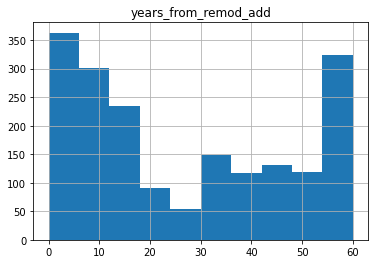

In [35]:
# Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)

print(ames.loc[:,"Year_Remod_Add"].describe())
ames['years_from_remod_add'] = (2010-ames['Year_Remod_Add'])
print(ames.loc[:,"years_from_remod_add"].describe())
ames.hist(column='years_from_remod_add')
ames.drop(['Year_Remod_Add'], axis=1,inplace=True)

In [36]:
#Roof Style (Nominal): Type of roof
print(ames.loc[:,"Roof_Style"].describe())
print(ames.Roof_Style.value_counts())

count      1882
unique        6
top       Gable
freq       1478
Name: Roof_Style, dtype: object
Gable      1478
Hip         366
Flat         17
Gambrel      14
Mansard       5
Shed          2
Name: Roof_Style, dtype: int64


In [37]:
#Roof Matl (Nominal): Roof material - mała różnorodność zmiennej -raczej nie wezme

print(ames.loc[:,"Roof_Matl"].describe())
print(ames.Roof_Matl.value_counts())

count        1882
unique          7
top       CompShg
freq         1849
Name: Roof_Matl, dtype: object
CompShg    1849
Tar&Grv      18
WdShake       7
WdShngl       5
ClyTile       1
Membran       1
Metal         1
Name: Roof_Matl, dtype: int64


In [38]:
# Exterior 1 (Nominal): Exterior covering on house]

print(ames.loc[:,"Exterior_1st"].describe())
print(ames.Exterior_1st.value_counts())

# Exterior 2 (Nominal): Exterior covering on house (if more than one material)

print(ames.loc[:,"Exterior_2nd"].describe())
print(ames.Exterior_2nd.value_counts())

count        1882
unique         14
top       VinylSd
freq          630
Name: Exterior_1st, dtype: object
VinylSd    630
HdBoard    297
Wd Sdng    280
MetalSd    270
Plywood    157
CemntBd     74
BrkFace     66
WdShing     38
Stucco      31
AsbShng     30
BrkComm      5
AsphShn      2
CBlock       1
Stone        1
Name: Exterior_1st, dtype: int64
count        1882
unique         16
top       VinylSd
freq          625
Name: Exterior_2nd, dtype: object
VinylSd    625
MetalSd    269
HdBoard    269
Wd Sdng    269
Plywood    195
CmentBd     72
Wd Shng     50
BrkFace     37
Stucco      34
AsbShng     26
Brk Cmn     15
ImStucc      8
Stone        5
AsphShn      4
CBlock       3
Other        1
Name: Exterior_2nd, dtype: int64


In [39]:
# Mas Vnr Type (Nominal): Masonry veneer type - okleina murarska - zostało założone że none to po prostu brak

print(ames.loc[:,"Mas_Vnr_Type"].describe())
print(ames.Mas_Vnr_Type.value_counts())



count     1871
unique       5
top       None
freq      1142
Name: Mas_Vnr_Type, dtype: object
None       1142
BrkFace     568
Stone       145
BrkCmn       15
CBlock        1
Name: Mas_Vnr_Type, dtype: int64


count     1882
unique     353
top          0
freq      1141
Name: Mas_Vnr_Area, dtype: object
count    1871.000000
mean       98.729022
std       174.003531
min         0.000000
25%         0.000000
50%         0.000000
75%       156.000000
max      1290.000000
Name: Mas_Vnr_Area, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FCD713C8>]],
      dtype=object)

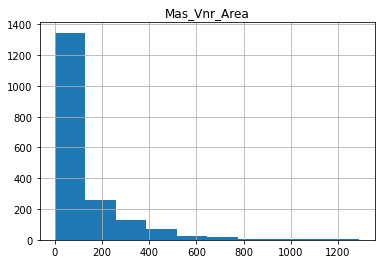

In [40]:
# Mas Vnr Area (Continuous): Masonry veneer area in square feet - 0 jest równoważne none
print(ames.loc[:,"Mas_Vnr_Area"].describe())
ames[["Mas_Vnr_Area"]] = ames[["Mas_Vnr_Area"]].replace('None', 'NaN')
ames['Mas_Vnr_Area'] = ames['Mas_Vnr_Area'].astype('float')
print(ames.loc[:,"Mas_Vnr_Area"].describe())
ames.hist(column='Mas_Vnr_Area')


In [41]:
# Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
print(ames.loc[:,"Exter_Qual"].describe())
print(ames.Exter_Qual.value_counts())

ames['Exter_Qual'] = ames['Exter_Qual'].astype('category')
print(ames.loc[:,"Exter_Qual"].describe())
ames['Exter_Qual']=ames['Exter_Qual'].cat.reorder_categories(['Fa','TA','Gd','Ex'])


count     1882
unique       4
top         TA
freq      1216
Name: Exter_Qual, dtype: object
TA    1216
Gd     589
Ex      61
Fa      16
Name: Exter_Qual, dtype: int64
count     1882
unique       4
top         TA
freq      1216
Name: Exter_Qual, dtype: object


In [42]:
# Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
print(ames.loc[:,"Exter_Cond"].describe())
print(ames.Exter_Cond.value_counts())

ames['Exter_Cond'] = ames['Exter_Cond'].astype('category')
print(ames.loc[:,"Exter_Cond"].describe())
ames['Exter_Cond']=ames['Exter_Cond'].cat.reorder_categories(['Fa','TA','Gd','Ex'])

count     1882
unique       4
top         TA
freq      1622
Name: Exter_Cond, dtype: object
TA    1622
Gd     216
Fa      36
Ex       8
Name: Exter_Cond, dtype: int64
count     1882
unique       4
top         TA
freq      1622
Name: Exter_Cond, dtype: object


In [43]:
# Foundation (Nominal): Type of foundation
print(ames.loc[:,"Foundation"].describe())
print(ames.Foundation.value_counts())
ames['Foundation'] = ames['Foundation'].astype('category')


count       1882
unique         6
top       CBlock
freq         856
Name: Foundation, dtype: object
CBlock    856
PConc     771
BrkTil    212
Slab       34
Stone       5
Wood        4
Name: Foundation, dtype: int64


In [44]:
print(ames.Bsmt_Qual.value_counts())

TA      879
Gd      750
Ex      147
Fa       54
None     51
Name: Bsmt_Qual, dtype: int64


In [45]:
#Bsmt Qual (Ordinal): Evaluates the height of the basement
print(ames.loc[:,"Bsmt_Qual"].describe())
print(ames.Bsmt_Qual.value_counts())

ames['Bsmt_Qual'] = ames['Bsmt_Qual'].astype('category')
ames['Bsmt_Qual']=ames['Bsmt_Qual'].cat.reorder_categories(['None','Fa','TA','Gd','Ex'])
print(ames.Bsmt_Qual.value_counts())

count     1881
unique       5
top         TA
freq       879
Name: Bsmt_Qual, dtype: object
TA      879
Gd      750
Ex      147
Fa       54
None     51
Name: Bsmt_Qual, dtype: int64
TA      879
Gd      750
Ex      147
Fa       54
None     51
Name: Bsmt_Qual, dtype: int64


In [46]:
#Bsmt Cond (Ordinal): Evaluates the general condition of the basement

print(ames.loc[:,"Bsmt_Cond"].describe())
print(ames.Bsmt_Cond.value_counts())

ames['Bsmt_Cond'] = ames['Bsmt_Cond'].astype('category')
ames['Bsmt_Cond']=ames['Bsmt_Cond'].cat.reorder_categories(['None','Po','Fa','TA','Gd','Ex'])
print(ames.Bsmt_Cond.value_counts())

count     1881
unique       6
top         TA
freq      1674
Name: Bsmt_Cond, dtype: object
TA      1674
Gd        82
Fa        69
None      51
Ex         3
Po         2
Name: Bsmt_Cond, dtype: int64
TA      1674
Gd        82
Fa        69
None      51
Ex         3
Po         2
Name: Bsmt_Cond, dtype: int64


In [47]:
#Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

print(ames.loc[:,"Bsmt_Exposure"].describe())
print(ames.Bsmt_Exposure.value_counts())

ames['Bsmt_Exposure'] = ames['Bsmt_Exposure'].astype('category')
ames['Bsmt_Exposure']=ames['Bsmt_Exposure'].cat.reorder_categories(['None','No','Mn','Av','Gd'])
print(ames.Bsmt_Exposure.value_counts())

count     1880
unique       5
top         No
freq      1218
Name: Bsmt_Exposure, dtype: object
No      1218
Av       268
Gd       188
Mn       155
None      51
Name: Bsmt_Exposure, dtype: int64
No      1218
Av       268
Gd       188
Mn       155
None      51
Name: Bsmt_Exposure, dtype: int64


In [48]:
# BsmtFin Type 1 (Ordinal): Rating of basement finished area

print(ames.loc[:,"BsmtFin_Type_1"].describe())
print(ames.BsmtFin_Type_1.value_counts())

ames['BsmtFin_Type_1'] = ames['BsmtFin_Type_1'].astype('category')
ames['BsmtFin_Type_1']=ames['BsmtFin_Type_1'].cat.reorder_categories(['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])
print(ames.BsmtFin_Type_1.value_counts())

count     1881
unique       7
top        GLQ
freq       526
Name: BsmtFin_Type_1, dtype: object
GLQ     526
Unf     516
ALQ     290
Rec     200
BLQ     192
LwQ     106
None     51
Name: BsmtFin_Type_1, dtype: int64
GLQ     526
Unf     516
ALQ     290
Rec     200
BLQ     192
LwQ     106
None     51
Name: BsmtFin_Type_1, dtype: int64


count     1882
unique     793
top          0
freq       567
Name: BsmtFin_SF_1, dtype: object
0       567
24       16
20        8
16        8
500       7
       ... 
853       1
373       1
65        1
1206      1
440       1
Name: BsmtFin_SF_1, Length: 793, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FCDE4B00>]],
      dtype=object)

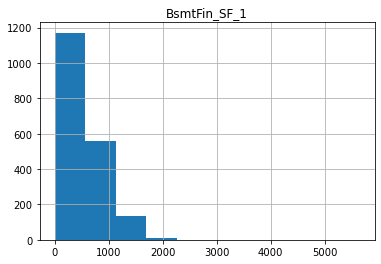

In [49]:
#BsmtFin SF 1 (Continuous): Type 1 finished square feet
print(ames.loc[:,"BsmtFin_SF_1"].describe())
ames[["BsmtFin_SF_1"]] = ames[["BsmtFin_SF_1"]].replace('None', 'NaN')
print(ames.BsmtFin_SF_1.value_counts())
ames['BsmtFin_SF_1'] = ames['BsmtFin_SF_1'].astype('float')
ames["BsmtFin_SF_1"].fillna(ames["BsmtFin_SF_1"].mean(), inplace=True)
ames.hist(column='BsmtFin_SF_1')


In [50]:
#BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

print(ames.loc[:,"BsmtFin_Type_2"].describe())
print(ames.BsmtFin_Type_2.value_counts())

ames['BsmtFin_Type_2'] = ames['BsmtFin_Type_2'].astype('category')
ames['BsmtFin_Type_2']=ames['BsmtFin_Type_2'].cat.reorder_categories(['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])
print(ames.BsmtFin_Type_2.value_counts())

count     1880
unique       7
top        Unf
freq      1581
Name: BsmtFin_Type_2, dtype: object
Unf     1581
Rec       70
LwQ       67
None      51
BLQ       50
ALQ       35
GLQ       26
Name: BsmtFin_Type_2, dtype: int64
Unf     1581
Rec       70
LwQ       67
None      51
BLQ       50
ALQ       35
GLQ       26
Name: BsmtFin_Type_2, dtype: int64


0       1632
180        4
147        3
144        3
294        3
        ... 
321        1
547        1
596        1
1080       1
859        1
Name: BsmtFin_SF_2, Length: 210, dtype: int64
count    1882.000000
mean       55.217438
std       178.535757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFin_SF_2, dtype: float64


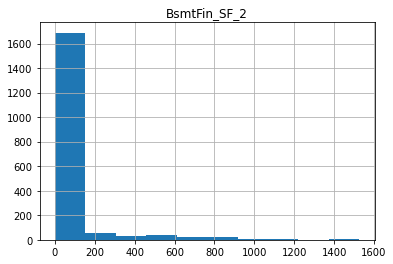

In [51]:
#BsmtFin SF 2 (Continuous): Type 2 finished square feet
ames[["BsmtFin_SF_2"]] = ames[["BsmtFin_SF_2"]].replace('None', 'NaN')
print(ames.BsmtFin_SF_2.value_counts())

ames['BsmtFin_SF_2'] = ames['BsmtFin_SF_2'].astype('float')
ames["BsmtFin_SF_2"].fillna(ames["BsmtFin_SF_2"].mean(), inplace=True)
ames.hist(column='BsmtFin_SF_2')
print(ames.loc[:,"BsmtFin_SF_2"].describe())

0       167
384      13
672      10
270       9
728       9
       ... 
1905      1
313       1
128       1
716       1
532       1
Name: Bsmt_Unf_SF, Length: 894, dtype: int64
count    1882.000000
mean      547.927698
std       436.063388
min         0.000000
25%       212.250000
50%       450.000000
75%       791.750000
max      2153.000000
Name: Bsmt_Unf_SF, dtype: float64


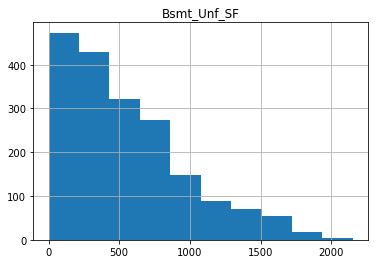

In [52]:
#Bsmt Unf SF (Continuous): Unfinished square feet of basement area

ames[["Bsmt_Unf_SF"]] = ames[["Bsmt_Unf_SF"]].replace('None', 'NaN')
print(ames.Bsmt_Unf_SF.value_counts())
ames['Bsmt_Unf_SF'] = ames['Bsmt_Unf_SF'].astype('float')
ames["Bsmt_Unf_SF"].fillna(ames["Bsmt_Unf_SF"].mean(), inplace=True)
ames.hist(column='Bsmt_Unf_SF')
print(ames.loc[:,"Bsmt_Unf_SF"].describe())

864     55
0       51
672     22
1040    22
768     20
        ..
1394     1
727      1
1473     1
1290     1
859      1
Name: Total_Bsmt_SF, Length: 841, dtype: int64
count    1881.000000
mean     1054.421584
std       433.685918
min         0.000000
25%       804.000000
50%       996.000000
75%      1296.000000
max      6110.000000
Name: Total_Bsmt_SF, dtype: float64


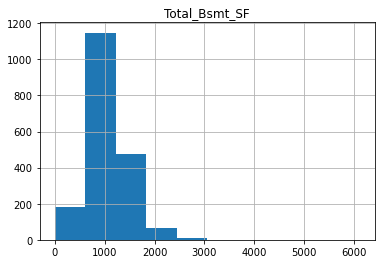

In [53]:
#Total Bsmt SF (Continuous): Total square feet of basement area
ames[["Total_Bsmt_SF"]] = ames[["Total_Bsmt_SF"]].replace('None', 'NaN')
print(ames.Total_Bsmt_SF.value_counts())
ames['Total_Bsmt_SF'] = ames['Total_Bsmt_SF'].astype('float')
ames.hist(column='Total_Bsmt_SF')
print(ames.loc[:,"Total_Bsmt_SF"].describe())

In [54]:
#Heating	(Nominal): Type of heating
print(ames.loc[:,"Heating"].describe())
print(ames.Heating.value_counts())
ames['Heating'] = ames['Heating'].astype('category')


count     1882
unique       6
top       GasA
freq      1851
Name: Heating, dtype: object
GasA     1851
GasW       19
Grav        5
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


In [55]:
#HeatingQC (Ordinal): Heating quality and condition

print(ames.loc[:,"Heating_QC"].describe())
print(ames.Heating_QC.value_counts())

ames['Heating_QC'] = ames['Heating_QC'].astype('category')
ames['Heating_QC']=ames['Heating_QC'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'])
print(ames.Heating_QC.value_counts())

count     1882
unique       5
top         Ex
freq       913
Name: Heating_QC, dtype: object
Ex    913
TA    605
Gd    303
Fa     60
Po      1
Name: Heating_QC, dtype: int64
Ex    913
TA    605
Gd    303
Fa     60
Po      1
Name: Heating_QC, dtype: int64


In [56]:
#Central Air (Nominal): Central air conditioning

print(ames.loc[:,"Central_Air"].describe())
print(ames.Central_Air.value_counts())
ames['Central_Air'] = ames['Central_Air'].astype('category')

count     1882
unique       2
top          Y
freq      1762
Name: Central_Air, dtype: object
Y    1762
N     120
Name: Central_Air, dtype: int64


In [57]:
#Electrical (Ordinal): Electrical system - 
print(ames.loc[:,"Electrical"].describe())
print(ames.Electrical.value_counts())

ames['Electrical'] = ames['Electrical'].astype('category')
ames['Electrical']=ames['Electrical'].cat.reorder_categories(['FuseP','FuseF','FuseA','SBrkr'])
print(ames.Heating_QC.value_counts())

count      1882
unique        4
top       SBrkr
freq       1725
Name: Electrical, dtype: object
SBrkr    1725
FuseA     117
FuseF      37
FuseP       3
Name: Electrical, dtype: int64
Ex    913
TA    605
Gd    303
Fa     60
Po      1
Name: Heating_QC, dtype: int64


count    1882.000000
mean     1164.744952
std       380.281497
min       407.000000
25%       884.000000
50%      1092.000000
75%      1392.000000
max      4692.000000
Name: X1st_Flr_SF, dtype: float64


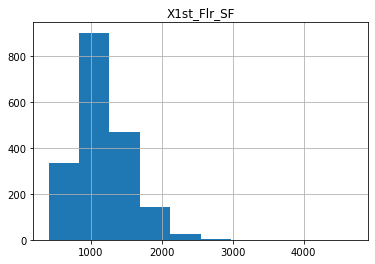

In [58]:
# 1st Flr SF (Continuous): First Floor square feet,
ames.hist(column='X1st_Flr_SF')
print(ames.loc[:,"X1st_Flr_SF"].describe())


count    1882.000000
mean      323.979277
std       425.426015
min         0.000000
25%         0.000000
50%         0.000000
75%       686.750000
max      2065.000000
Name: X2nd_Flr_SF, dtype: float64


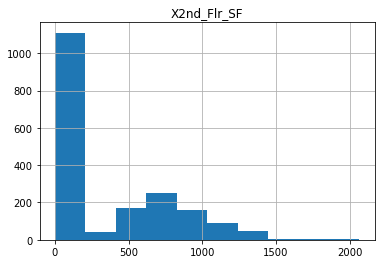

In [59]:
#2nd Flr SF (Continuous)	: Second floor square feet
ames.hist(column='X2nd_Flr_SF')
print(ames.loc[:,"X2nd_Flr_SF"].describe())

count    1882.000000
mean        4.526036
std        43.752538
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       697.000000
Name: Low_Qual_Fin_SF, dtype: float64


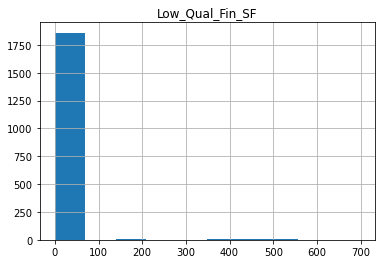

In [60]:
# Low Qual Fin SF (Continuous): Low quality finished square feet (all floors) - zmienna o małej liczbie unikalych wartosci - odrzucamy

ames.hist(column='Low_Qual_Fin_SF')
print(ames.loc[:,"Low_Qual_Fin_SF"].describe())

count    1882.000000
mean     1493.250266
std       504.170432
min       407.000000
25%      1114.000000
50%      1440.000000
75%      1733.000000
max      5642.000000
Name: Gr_Liv_Area, dtype: float64


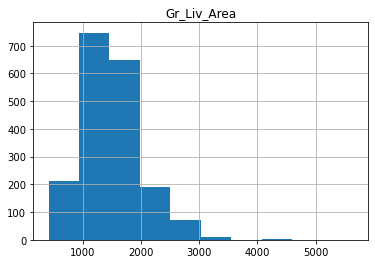

In [61]:
#Gr Liv Area (Continuous): Above grade (ground) living area square feet

ames.hist(column='Gr_Liv_Area')
print(ames.loc[:,"Gr_Liv_Area"].describe())

In [62]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MS_SubClass           1882 non-null   category
 1   MS_Zoning             1882 non-null   category
 2   Lot_Frontage          1882 non-null   float64 
 3   Lot_Area              1882 non-null   int64   
 4   Street                1882 non-null   object  
 5   Alley                 1882 non-null   object  
 6   Lot_Shape             1882 non-null   category
 7   Land_Contour          1882 non-null   object  
 8   Lot_Config            1882 non-null   object  
 9   Land_Slope            1882 non-null   category
 10  Neighborhood          1882 non-null   object  
 11  Condition_1           1882 non-null   object  
 12  Condition_2           1882 non-null   object  
 13  Bldg_Type             1882 non-null   object  
 14  House_Style           1882 non-null   object  
 15  Over

In [63]:
##### Bathroom Vars

#Bsmt Full Bath (Discrete): Basement full bathrooms
print(ames.loc[:,"Bsmt_Full_Bath"].describe())
print(ames.Bsmt_Full_Bath.value_counts())
ames['Bsmt_Full_Bath'] = ames['Bsmt_Full_Bath'].astype('category')

#Bsmt Half Bath (Discrete): Basement half bathrooms

print(ames.loc[:,"Bsmt_Half_Bath"].describe())
print(ames.Bsmt_Half_Bath.value_counts())
ames['Bsmt_Half_Bath'] = ames['Bsmt_Half_Bath'].astype('category')


#Full Bath (Discrete): Full bathrooms above grade

print(ames.loc[:,"Full_Bath"].describe())
print(ames.Full_Bath.value_counts())
ames['Full_Bath'] = ames['Full_Bath'].astype('category')
#Bsmt Half Bath (Discrete): Basement half bathrooms

print(ames.loc[:,"Half_Bath"].describe())
print(ames.Half_Bath.value_counts())
ames['Half_Bath'] = ames['Half_Bath'].astype('category')

count     1882
unique       5
top          0
freq      1078
Name: Bsmt_Full_Bath, dtype: object
0       1078
1        776
2         26
None       1
3          1
Name: Bsmt_Full_Bath, dtype: int64
count     1882
unique       4
top          0
freq      1752
Name: Bsmt_Half_Bath, dtype: object
0       1752
1        125
2          4
None       1
Name: Bsmt_Half_Bath, dtype: int64
count    1882.000000
mean        1.541977
std         0.552017
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Full_Bath, dtype: float64
2    944
1    887
3     41
0      9
4      1
Name: Full_Bath, dtype: int64
count    1882.000000
mean        0.359192
std         0.499434
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Half_Bath, dtype: float64
0    1224
1     640
2      18
Name: Half_Bath, dtype: int64


In [64]:
#Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

print(ames.loc[:,"Bedroom_AbvGr"].describe())
print(ames.Bedroom_AbvGr.value_counts())

count    1882.000000
mean        2.888948
std         0.834462
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Bedroom_AbvGr, dtype: float64
3    1052
2     438
4     268
1      69
5      32
6      16
0       6
8       1
Name: Bedroom_AbvGr, dtype: int64


In [65]:
# Kitchen (Discrete): Kitchens above grade - liczba kuchni powyżej poziomu parteru - raczej order factor

print(ames.loc[:,"Kitchen_AbvGr"].describe())
print(ames.Kitchen_AbvGr.value_counts())


count    1882.000000
mean        1.048884
std         0.225327
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kitchen_AbvGr, dtype: float64
1    1785
2      93
0       3
3       1
Name: Kitchen_AbvGr, dtype: int64


In [66]:
#KitchenQual (Ordinal): Kitchen quality

print(ames.loc[:,"Kitchen_Qual"].describe())
print(ames.Kitchen_Qual.value_counts())

ames['Kitchen_Qual'] = ames['Kitchen_Qual'].astype('category')
ames['Kitchen_Qual']=ames['Kitchen_Qual'].cat.reorder_categories(['Fa','TA','Gd','Ex'])
print(ames.Kitchen_Qual.value_counts())

count     1882
unique       4
top         TA
freq      1007
Name: Kitchen_Qual, dtype: object
TA    1007
Gd     699
Ex     128
Fa      48
Name: Kitchen_Qual, dtype: int64
TA    1007
Gd     699
Ex     128
Fa      48
Name: Kitchen_Qual, dtype: int64


In [67]:
#TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)
print(ames.loc[:,"TotRms_AbvGrd"].describe())
print(ames.TotRms_AbvGrd.value_counts())

count    1882.000000
mean        6.463868
std         1.565858
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRms_AbvGrd, dtype: float64
6     549
7     407
5     379
8     224
4     120
9      99
10     57
11     19
3      17
12     10
14      1
Name: TotRms_AbvGrd, dtype: int64


In [68]:
#Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)
print(ames.loc[:,"Functional"].describe())
print(ames.Functional.value_counts())

ames['Functional'] = ames['Functional'].astype('category')
ames['Functional'] = ames['Functional'].cat.reorder_categories(['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'])
print(ames.Kitchen_Qual.value_counts())

count     1882
unique       7
top        Typ
freq      1755
Name: Functional, dtype: object
Typ     1755
Min1      44
Min2      43
Mod       21
Maj1      12
Maj2       5
Sev        2
Name: Functional, dtype: int64
TA    1007
Gd     699
Ex     128
Fa      48
Name: Kitchen_Qual, dtype: int64


In [69]:
#Fireplaces (Discrete): Number of fireplaces
print(ames.loc[:,"Fireplaces"].describe())
print(ames.Fireplaces.value_counts())


count    1882.000000
mean        0.607864
std         0.655652
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
0    908
1    813
2    153
3      7
4      1
Name: Fireplaces, dtype: int64


In [70]:
#FireplaceQu (Ordinal): Fireplace quality

print(ames.loc[:,"Fireplace_Qu"].describe())
print(ames.Fireplace_Qu.value_counts())

ames['Fireplace_Qu'] = ames['Fireplace_Qu'].astype('category')
ames['Fireplace_Qu']=ames['Fireplace_Qu'].cat.reorder_categories(['None','Po','Fa','TA','Gd','Ex'])
print(ames.Fireplace_Qu.value_counts())


count     1882
unique       6
top       None
freq       908
Name: Fireplace_Qu, dtype: object
None    908
Gd      466
TA      402
Fa       50
Po       34
Ex       22
Name: Fireplace_Qu, dtype: int64
None    908
Gd      466
TA      402
Fa       50
Po       34
Ex       22
Name: Fireplace_Qu, dtype: int64


In [71]:
#Garage Type (Nominal): Garage location
print(ames.loc[:,"Garage_Type"].describe())
print(ames.Garage_Type.value_counts())



count       1882
unique         7
top       Attchd
freq        1113
Name: Garage_Type, dtype: object
Attchd     1113
Detchd      494
BuiltIn     115
None        106
Basment      27
2Types       15
CarPort      12
Name: Garage_Type, dtype: int64


count     1882
unique      99
top        NaN
freq       108
Name: Garage_Yr_Blt, dtype: object
2005.0    87
2006.0    62
2007.0    62
2004.0    54
2003.0    53
          ..
1923.0     1
1908.0     1
1933.0     1
1943.0     1
1917.0     1
Name: Garage_Yr_Blt, Length: 98, dtype: int64
count    1774.000000
mean       33.471251
std        24.564682
min         0.000000
25%        10.000000
50%        33.000000
75%        51.000000
max       110.000000
Name: Garage_age, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FCEB0358>]],
      dtype=object)

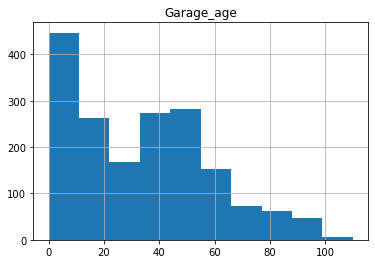

In [72]:
#Garage Yr Blt (Discrete): Year garage was built
#Nowa zmienna - wiek garażu

ames[["Garage_Yr_Blt"]] = ames[["Garage_Yr_Blt"]].replace('None', 'NaN')
print(ames.loc[:,"Garage_Yr_Blt"].describe())
ames['Garage_Yr_Blt'] = ames['Garage_Yr_Blt'].astype('float')
print(ames.Garage_Yr_Blt.value_counts())
#wiek
ames['Garage_age'] = (2010-ames['Garage_Yr_Blt'])# nie wiem czemu to nie działa

print(ames.loc[:,"Garage_age"].describe())
ames.hist(column='Garage_age')


In [73]:
#Garage Finish (Ordinal)	: Interior finish of the garage

print(ames.loc[:,"Garage_Finish"].describe())
print(ames.Garage_Finish.value_counts())

ames['Garage_Finish'] = ames['Garage_Finish'].astype('category')
ames['Garage_Finish']=ames['Garage_Finish'].cat.reorder_categories(['None','Unf','RFn','Fin'])
print(ames.Garage_Finish.value_counts())

count     1880
unique       4
top        Unf
freq       805
Name: Garage_Finish, dtype: object
Unf     805
RFn     524
Fin     445
None    106
Name: Garage_Finish, dtype: int64
Unf     805
RFn     524
Fin     445
None    106
Name: Garage_Finish, dtype: int64


In [74]:
#Garage Cars (Discrete): Size of garage in car capacity

print(ames.loc[:,"Garage_Cars"].describe())
print(ames.Garage_Cars.value_counts())

count     1882
unique       7
top          2
freq      1001
Name: Garage_Cars, dtype: object
2       1001
1        529
3        235
0        106
4          9
None       1
5          1
Name: Garage_Cars, dtype: int64


0      106
576     72
440     52
484     49
240     48
      ... 
896      1
356      1
265      1
916      1
601      1
Name: Garage_Area, Length: 512, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FD013518>]],
      dtype=object)

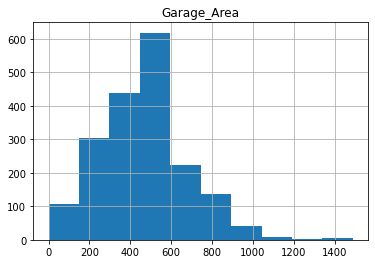

In [75]:
#Garage Area (Continuous): Size of garage in square feet
ames[["Garage_Area"]] = ames[["Garage_Area"]].replace('None', 'NaN')
print(ames.Garage_Area.value_counts())
ames['Garage_Area'] = ames['Garage_Area'].astype('float')
ames['Garage_Area']=ames['Garage_Area'].fillna(0)#wypełniamy zerem - sprawdzone zenie ma dlaniego
ames.hist(column='Garage_Area')

In [76]:
#Garage Qual (Ordinal): Garage quality
print(ames.loc[:,"Garage_Qual"].describe())
ames['Garage_Qual'] = ames['Garage_Qual'].astype('category')
ames['Garage_Qual']=ames['Garage_Qual'].cat.reorder_categories(['None','Po','Fa','TA','Gd','Ex'])
print(ames.Garage_Qual.value_counts())

#Garage Cond (Ordinal): Garage condition
print(ames.loc[:,"Garage_Cond"].describe())
print(ames.Garage_Cond.value_counts())

ames['Garage_Cond'] = ames['Garage_Cond'].astype('category')
ames['Garage_Cond']=ames['Garage_Cond'].cat.reorder_categories(['None','Po','Fa','TA','Gd','Ex'])


count     1881
unique       6
top         TA
freq      1674
Name: Garage_Qual, dtype: object
TA      1674
None     107
Fa        82
Gd        15
Po         2
Ex         1
Name: Garage_Qual, dtype: int64
count     1881
unique       6
top         TA
freq      1704
Name: Garage_Cond, dtype: object
TA      1704
None     107
Fa        52
Gd         9
Po         7
Ex         2
Name: Garage_Cond, dtype: int64


In [77]:
#Paved Drive (Ordinal): Paved driveway

print(ames.loc[:,"Paved_Drive"].describe())
print(ames.Paved_Drive.value_counts())

ames['Paved_Drive'] = ames['Paved_Drive'].astype('category')
ames['Paved_Drive']=ames['Paved_Drive'].cat.reorder_categories(['N','P','Y'])
print(ames.Paved_Drive.value_counts())

count     1882
unique       3
top          Y
freq      1700
Name: Paved_Drive, dtype: object
Y    1700
N     136
P      46
Name: Paved_Drive, dtype: int64
Y    1700
N     136
P      46
Name: Paved_Drive, dtype: int64


count    1882.000000
mean       95.608927
std       128.597299
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       870.000000
Name: Wood_Deck_SF, dtype: float64
count    1882.000000
mean       43.068013
std        62.904099
min         0.000000
25%         0.000000
50%        21.500000
75%        66.000000
max       742.000000
Name: Open_Porch_SF, dtype: float64
count    1882.000000
mean       24.736451
std        67.287126
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: Enclosed_Porch, dtype: float64
count    1882.000000
mean        2.202976
std        21.211831
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       320.000000
Name: X3Ssn_Porch, dtype: float64
0      1860
168       3
216       2
180       2
290       1
150       1
96        1
120       1
130       1
140       1
144       1
162       1
153       1
245       1
304       1
176   

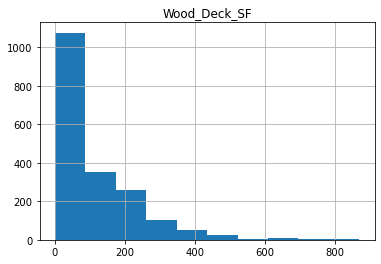

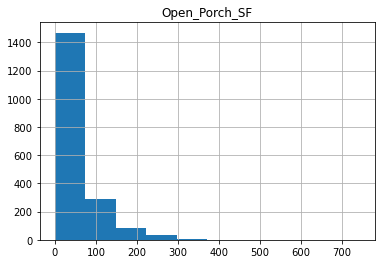

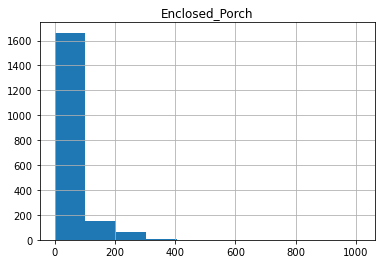

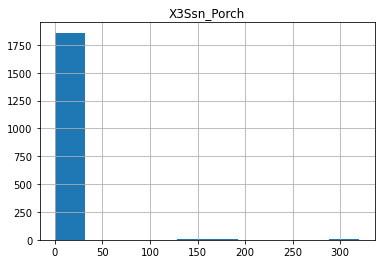

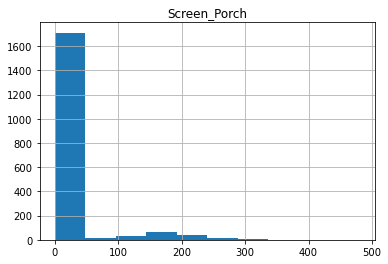

In [78]:
# Zmienne dla różnych innych obszarów w metrach kwadratowych - zmienne ciągłe 

#Wood Deck SF (Continuous): Wood deck area in square feet
ames.hist(column='Wood_Deck_SF')
print(ames.loc[:,"Wood_Deck_SF"].describe())

#Open Porch SF (Continuous): Open porch area in square feet

ames.hist(column='Open_Porch_SF')
print(ames.loc[:,"Open_Porch_SF"].describe())

# Enclosed Porch (Continuous): Enclosed porch area in square feet

ames.hist(column='Enclosed_Porch')
print(ames.loc[:,"Enclosed_Porch"].describe())

# 3-Ssn Porch (Continuous): Three season porch area in square feet - brak zróżnicowania zmiennej, mało unikalnych wartosci jakna zmienna ciagla - wykluczamy

ames.hist(column='X3Ssn_Porch')
print(ames.loc[:,"X3Ssn_Porch"].describe())

print(ames.X3Ssn_Porch.value_counts())

#Screen Porch (Continuous): Screen porch area in square feet

ames.hist(column='Screen_Porch')
print(ames.loc[:,"Screen_Porch"].describe())

print(ames.Screen_Porch.value_counts())

count    1882.000000
mean        3.117960
std        42.343007
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool_Area, dtype: float64
0      1871
800       1
738       1
648       1
576       1
555       1
519       1
512       1
480       1
444       1
368       1
228       1
Name: Pool_Area, dtype: int64
count     1882
unique       5
top       None
freq      1871
Name: Pool_QC, dtype: object
None    1871
Gd         4
Ex         3
TA         2
Fa         2
Name: Pool_QC, dtype: int64


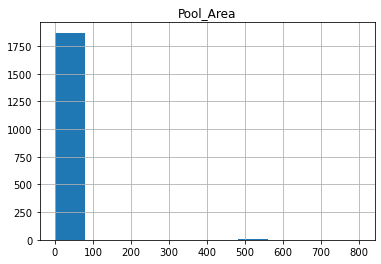

In [79]:
# Pool variables 

#Pool Area (Continuous): Pool area in square feet - mało domów ma dostęp do basenu - bardziej zmienna o istnieniu basenu się nadaje

ames.hist(column='Pool_Area')
print(ames.loc[:,"Pool_Area"].describe())
print(ames.Pool_Area.value_counts())
# Pool QC (Ordinal): Pool quality

print(ames.loc[:,"Pool_QC"].describe())
ames['Pool_QC'] = ames['Pool_QC'].astype('category')
ames['Pool_QC']=ames['Pool_QC'].cat.reorder_categories(['None','Fa','TA','Gd','Ex'])
print(ames.Pool_QC.value_counts())

In [80]:
#Fence (Ordinal): Fence quality

print(ames.loc[:,"Fence"].describe())


ames['Fence'] = ames['Fence'].astype('category')
ames['Fence']=ames['Fence'].cat.reorder_categories(['None','MnWw','GdWo','MnPrv','GdPrv'])
print(ames.Fence.value_counts())

count     1882
unique       5
top       None
freq      1489
Name: Fence, dtype: object
None     1489
MnPrv     232
GdPrv      78
GdWo       76
MnWw        7
Name: Fence, dtype: int64


count     1882
unique       5
top       None
freq      1810
Name: Misc_Feature, dtype: object
None    1810
Shed      67
Gar2       2
Othr       2
TenC       1
Name: Misc_Feature, dtype: int64
count     1882.000000
mean        44.852285
std        454.162550
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: Misc_Val, dtype: float64


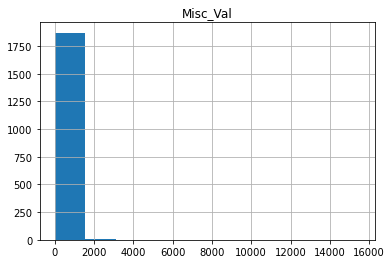

In [81]:
#Misc Feature (Nominal): Miscellaneous feature not covered in other categories

print(ames.loc[:,"Misc_Feature"].describe())
print(ames.Misc_Feature.value_counts())

ames['Misc_Feature'] = ames['Misc_Feature'].astype('category')


#Misc Val (Continuous): $Value of miscellaneous feature - raczej tez sie zmienna nie nadaje - zdecydowana wiekszosc nie ma 
# wartosciowych iscellaneous features

ames.hist(column='Misc_Val')
print(ames.loc[:,"Misc_Val"].describe())


In [82]:
# Cechy sprzedazy

#Mo Sold (Discrete): Month Sold (MM)
print(ames.loc[:,"Mo_Sold"].describe())
print(ames.Mo_Sold.value_counts())
# zamiana na kategoryczny

ames['Mo_Sold'] = ames['Mo_Sold'].astype('category')
#Yr Sold (Discrete): Year Sold (YYYY)
print(ames.loc[:,"Yr_Sold"].describe())
print(ames.Yr_Sold.value_counts())

ames['Yr_Sold'] = ames['Yr_Sold'].astype('category')

# Mozna jeszcze stworzyc wiek posiadlosci w momencie sprzedazy, ale wydaje sie ze w stosunku do wieku 
#nieruchomosci nie bedzie miała wielkiego znaczenia - lata sprzedazy to 2006-2010

# Sale Type (Nominal): Type of sale
print(ames.loc[:,"Sale_Type"].describe())
print(ames.Sale_Type.value_counts())
# Sale Condition (Nominal): Condition of sale
print(ames.loc[:,"Sale_Condition"].describe())
print(ames.Sale_Condition.value_counts())


count    1882.000000
mean        6.204570
std         2.719399
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: Mo_Sold, dtype: float64
6     330
7     289
5     240
4     184
3     150
8     149
9     109
10    104
11     90
2      89
1      79
12     69
Name: Mo_Sold, dtype: int64
count    1882.000000
mean     2007.790648
std         1.312743
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: Yr_Sold, dtype: float64
2007    448
2009    424
2006    399
2008    397
2010    214
Name: Yr_Sold, dtype: int64
count     1882
unique      10
top        WD 
freq      1658
Name: Sale_Type, dtype: object
WD       1658
New       124
COD        62
ConLD      12
ConLI       9
CWD         7
ConLw       4
Oth         3
Con         2
VWD         1
Name: Sale_Type, dtype: int64
count       1882
unique         6
top       Normal
freq        1565
Name: Sale_Condition, dtype: object
Nor

count      1882.000000
mean     178717.047290
std       78643.870985
min       12789.000000
25%      128500.000000
50%      158000.000000
75%      209875.000000
max      755000.000000
Name: SalePrice, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FCEEE5C0>]],
      dtype=object)

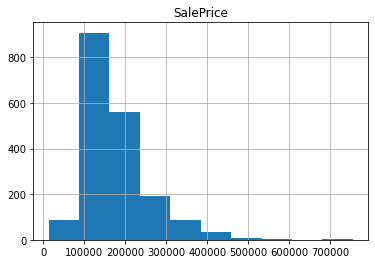

In [83]:
# SalePrice - zmienna zależna
print(ames.loc[:,"SalePrice"].describe())
ames.hist(column='SalePrice')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FCCB75C0>]],
      dtype=object)

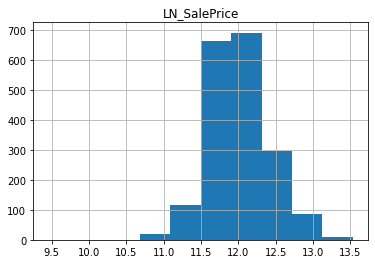

In [84]:
#Być może warto by było analizować logarytm, który ma nieco bardziej zblizony rozklad do rozkladu normalnego
ames['LN_SalePrice'] = np.log(ames['SalePrice'])
ames.hist(column='LN_SalePrice')

In [85]:
ames = ames.drop("LN_SalePrice",axis=1)

In [86]:
cols=ames.columns.tolist()

In [87]:
cols

['MS_SubClass',
 'MS_Zoning',
 'Lot_Frontage',
 'Lot_Area',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Mas_Vnr_Area',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_SF_1',
 'BsmtFin_Type_2',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'X1st_Flr_SF',
 'X2nd_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Kitchen_Qual',
 'TotRms_AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Yr_Blt',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_Area',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Wood_De

In [88]:
#ustawienie odpowiedniej kolejnosci do korelacji
cols=ames.columns.tolist()
del cols[-4]
cols.append('SalePrice')

ames=ames[cols]

In [132]:
ames.columns

Index(['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Lot_Config', 'Land_Slope',
       'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'X1st_Flr_SF',
       'X2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
       'Garage_Finish', 'Garage_Cars', 'Garage_Area', 'Garage_Qual',
   

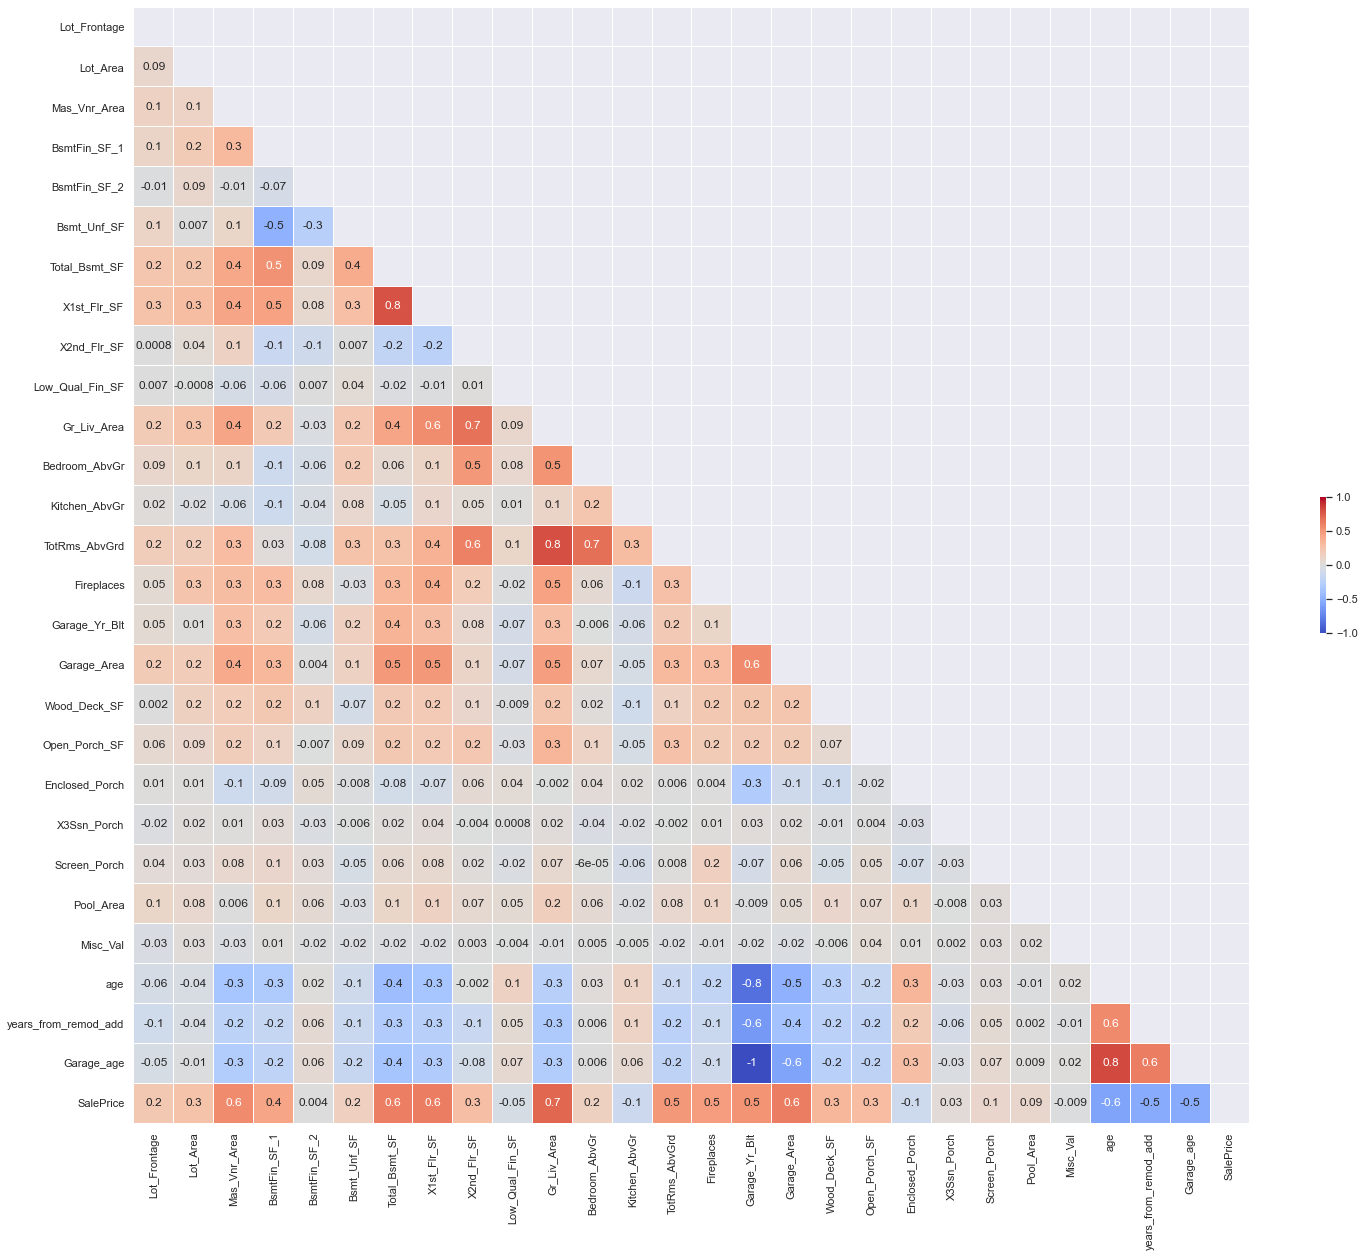

In [90]:
# Wstępna macierz korelacjidla zmiennych ciaglych - jeszcze pozniej poprawki typow zmiennych

sns.set(style="darkgrid")

corr = ames.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.1, cbar_kws={"shrink": .1}, ax=ax,annot=True, fmt='.1g',vmin=-1, center= 0)
plt.show()

In [134]:
ames.corr().abs()

,Lot_Frontage,Lot_Area,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,X1st_Flr_SF,X2nd_Flr_SF,Low_Qual_Fin_SF,...,Open_Porch_SF,Enclosed_Porch,X3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,age,years_from_remod_add,Garage_age,SalePrice
Lot_Frontage,1.000000,0.092028,0.141670,0.114133,0.012463,0.122982,0.237655,0.263137,0.000791,0.007411,...,0.062963,0.013098,0.016416,0.036041,0.108415,0.034418,0.055319,0.097319,0.050607,0.221339
Lot_Area,0.092028,1.000000,0.130449,0.197929,0.086910,0.007304,0.249530,0.299749,0.040305,0.000805,...,0.094314,0.012779,0.016588,0.032501,0.078685,0.029349,0.044765,0.044219,0.009525,0.260987
Mas_Vnr_Area,0.141670,0.130449,1.000000,0.314524,0.010365,0.104314,0.428514,0.441705,0.134341,0.058901,...,0.172122,0.109680,0.010782,0.081379,0.005673,0.026939,0.344143,0.222589,0.284675,0.563662
BsmtFin_SF_1,0.114133,0.197929,0.314524,1.000000,0.068585,0.477299,0.534409,0.456680,0.147954,0.064855,...,0.127740,0.092740,0.034398,0.097594,0.109212,0.011040,0.300436,0.164153,0.210056,0.444853
BsmtFin_SF_2,0.012463,0.086910,0.010365,0.068585,1.000000,0.251522,0.087299,0.076795,0.104743,0.006555,...,0.006825,0.049970,0.028662,0.034568,0.055259,0.015073,0.015584,0.056044,0.056120,0.003746
Bsmt_Unf_SF,0.122982,0.007304,0.104314,0.477299,0.251522,1.000000,0.404501,0.288040,0.006692,0.044789,...,0.092826,0.008072,0.006054,0.051114,0.030097,0.024156,0.106177,0.140532,0.158029,0.157824
Total_Bsmt_SF,0.237655,0.249530,0.428514,0.534409,0.087299,0.404501,1.000000,0.797602,0.190702,0.019878,...,0.223772,0.084244,0.017975,0.064589,0.106360,0.018990,0.413704,0.289620,0.358286,0.624387
X1st_Flr_SF,0.263137,0.299749,0.441705,0.456680,0.076795,0.288040,0.797602,1.000000,0.226694,0.011445,...,0.207595,0.071946,0.036760,0.075117,0.140909,0.020358,0.345544,0.255294,0.289577,0.630399
X2nd_Flr_SF,0.000791,0.040305,0.134341,0.147954,0.104743,0.006692,0.190702,0.226694,1.000000,0.010826,...,0.229030,0.057687,0.004234,0.020527,0.067763,0.002514,0.001768,0.145363,0.079267,0.294706
Low_Qual_Fin_SF,0.007411,0.000805,0.058901,0.064855,0.006555,0.044789,0.019878,0.011445,0.010826,1.000000,...,0.026485,0.044054,0.000799,0.024375,0.049973,0.003865,0.133236,0.053724,0.066392,0.049505


# Wykresy pudelkowe dla zmiennych kategorycznych

In [92]:
character_features=[x for x in ames.columns if ames[x].dtype!=np.int64 and ames[x].dtype != np.float64]

In [93]:
character_features

['MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_2',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Kitchen_Qual',
 'Functional',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Pool_QC',
 'Fence',
 'Misc_Feature',
 'Mo_Sold',
 'Yr_Sold',
 'Sale_Type',
 'Sale_Condition']

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

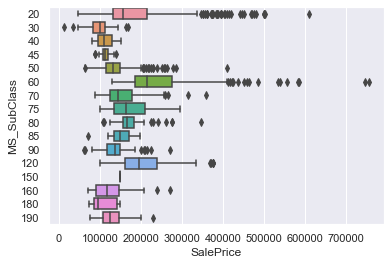

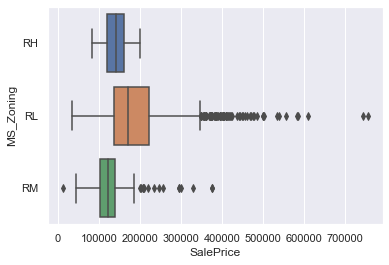

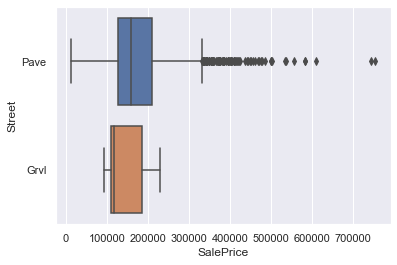

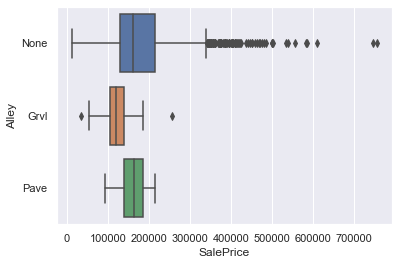

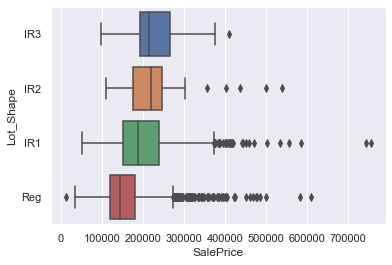

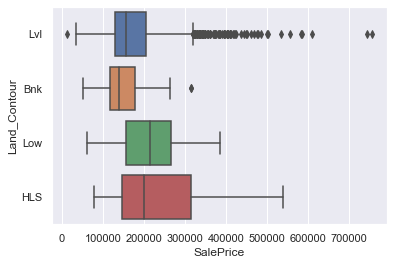

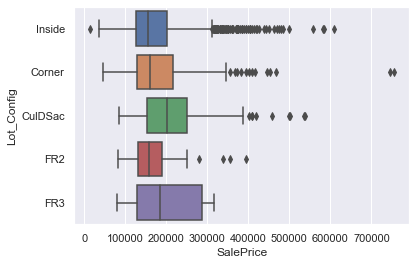

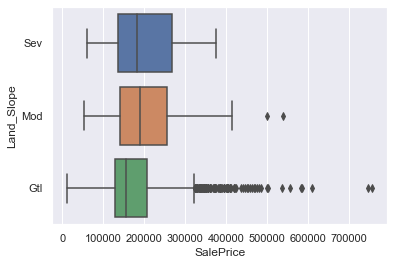

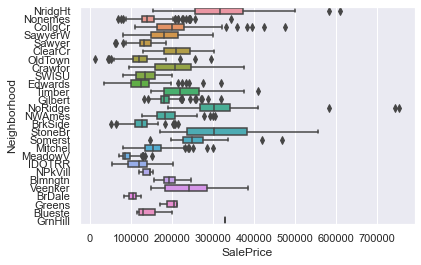

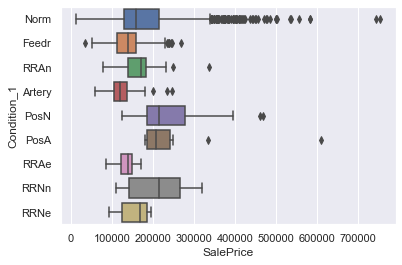

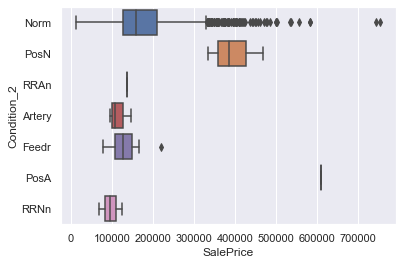

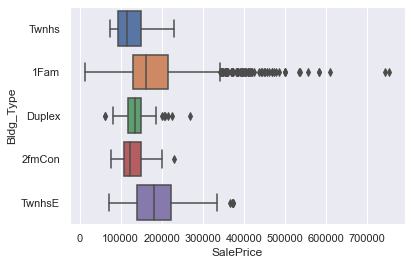

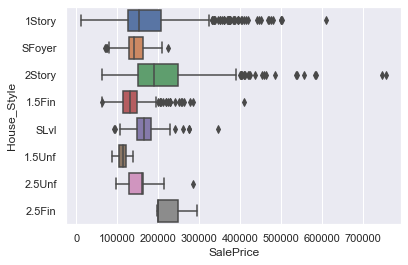

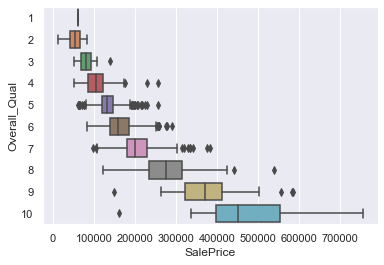

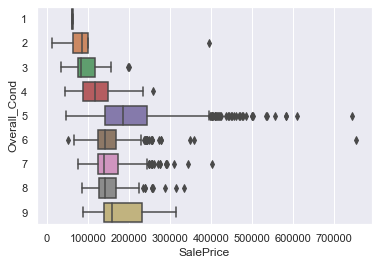

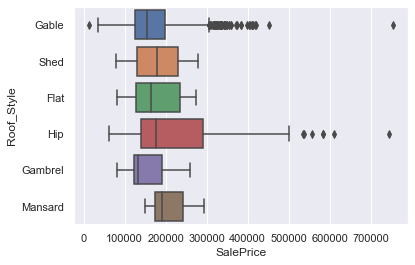

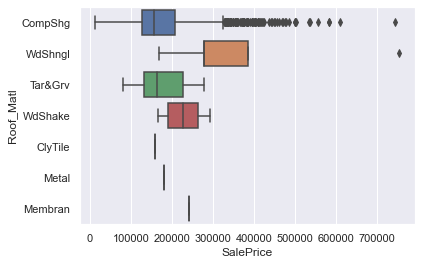

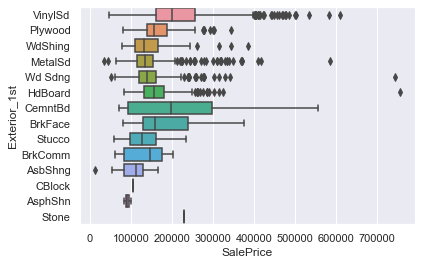

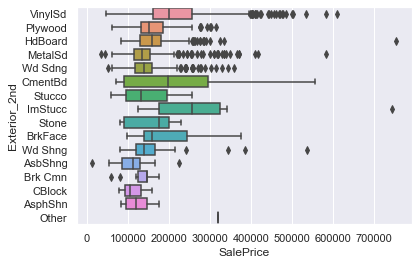

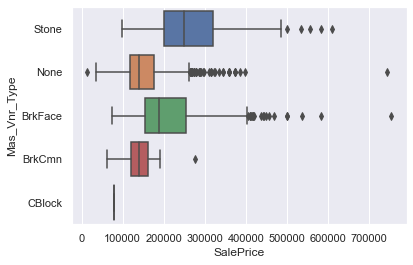

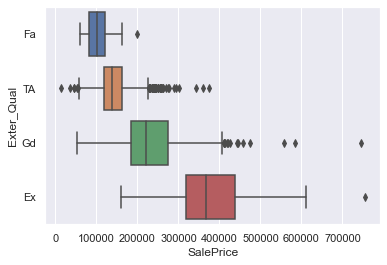

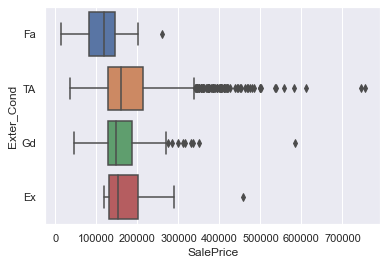

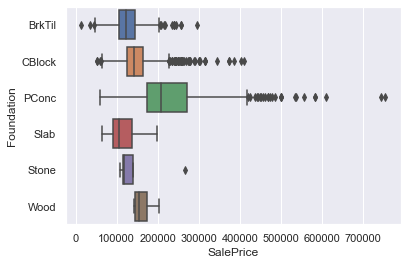

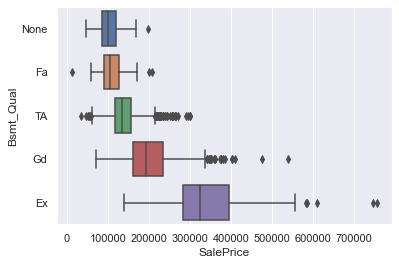

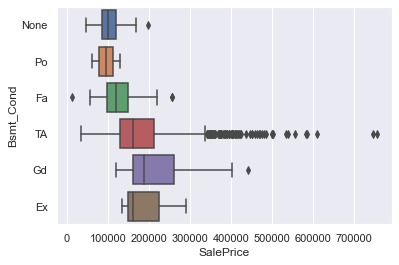

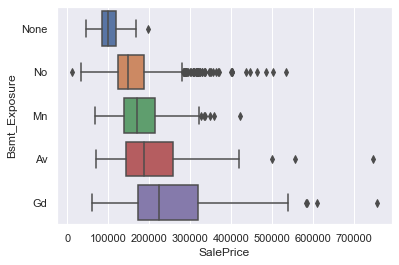

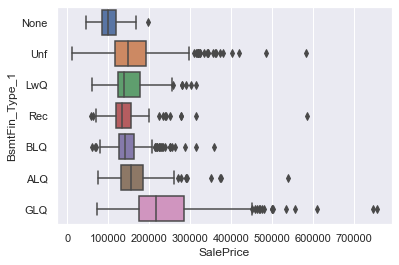

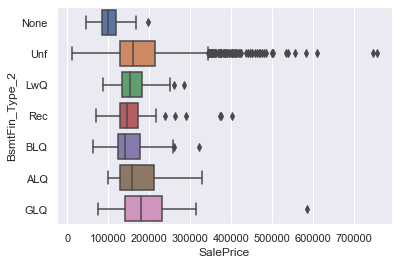

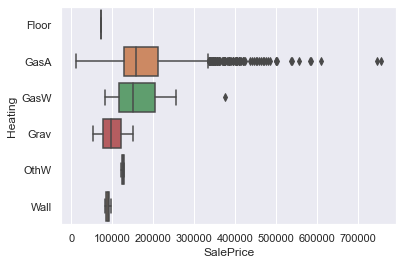

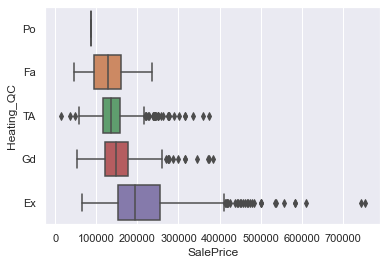

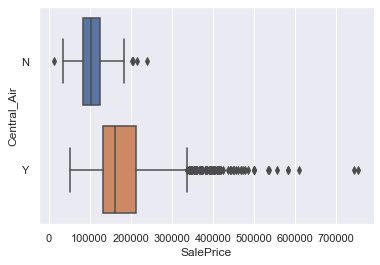

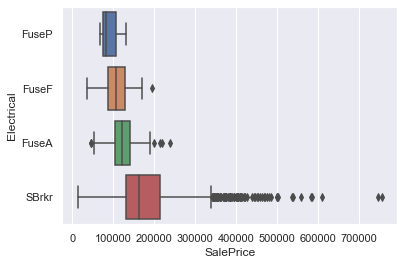

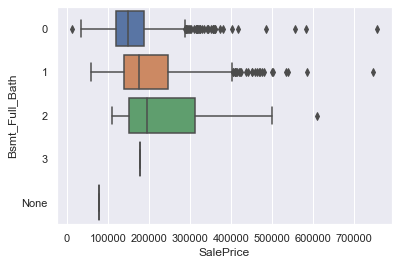

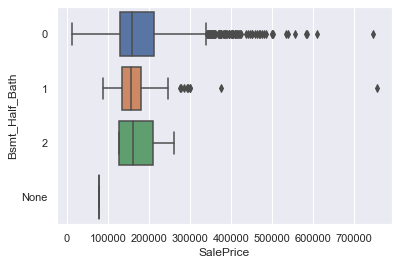

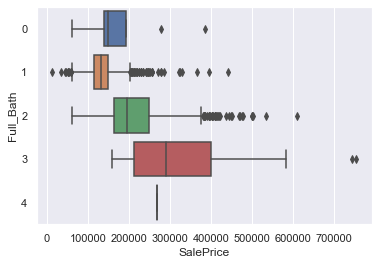

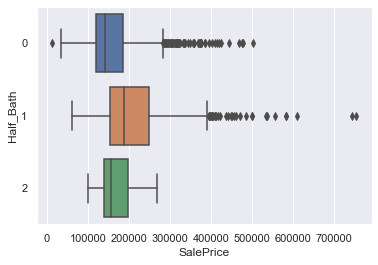

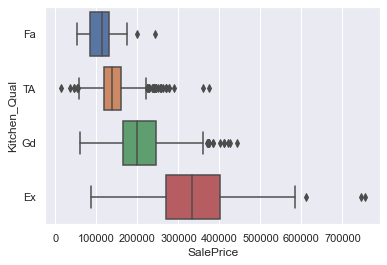

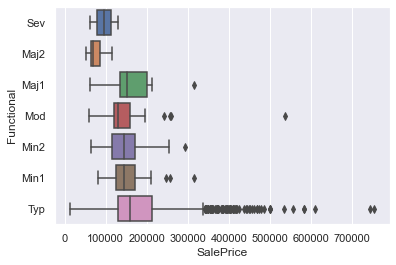

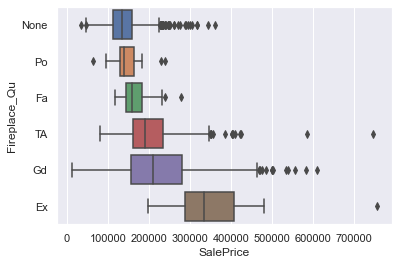

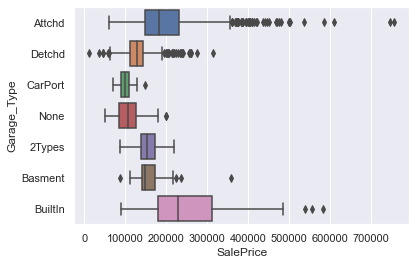

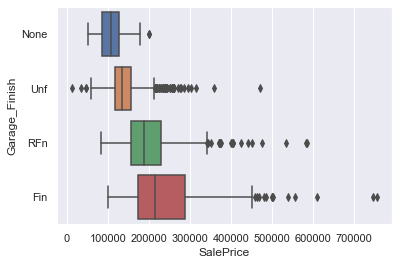

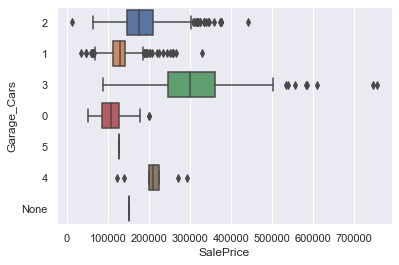

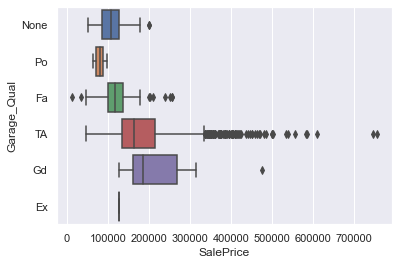

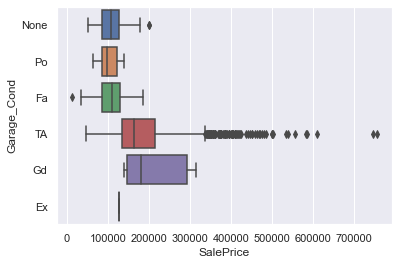

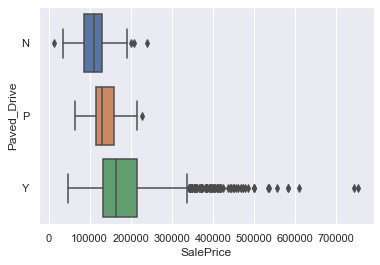

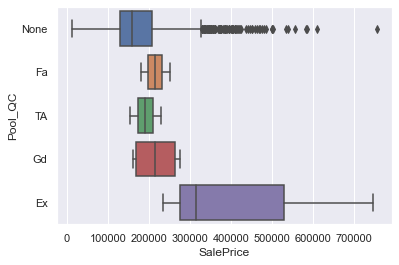

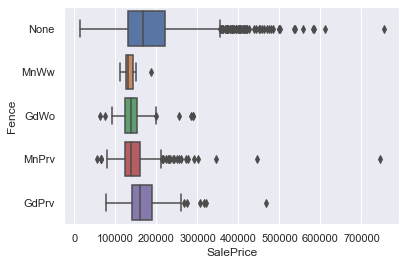

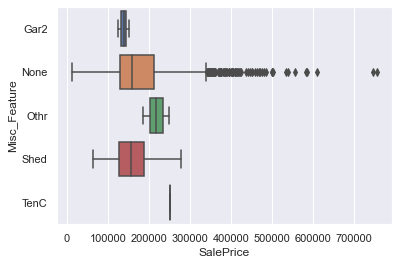

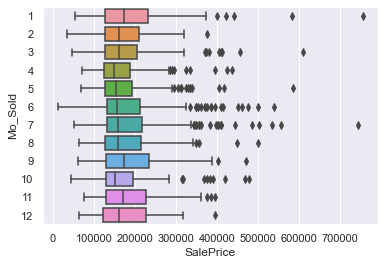

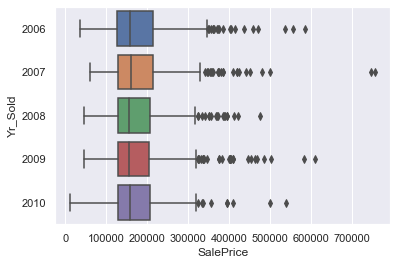

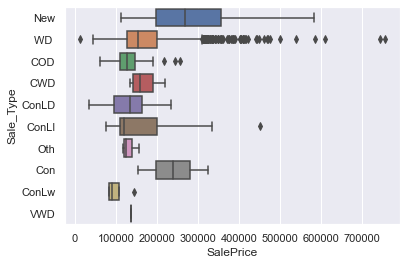

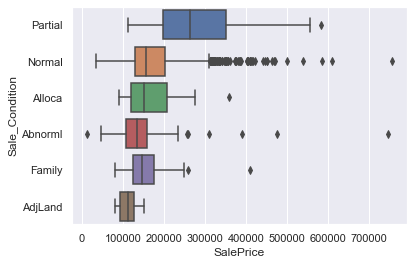

In [94]:
for i in ames[character_features].columns:
    plt.figure()
    sns.boxplot(y=ames[i],x='SalePrice',data=ames)
  #  sns.stripplot(y='i',x='SalePrice',data=ames,color='black',size=2)

__Zmienne kategoryczne - łączenie małolicznych kategorii + dalsze poprawy formatów__

In [135]:
# Funkcja do ograniczenia liczby obserwacji  - wynikiem jest lista kategorii ktore bedzie uwzgledniona w ostatecznej zmiennej
# Ogólna zasada max 6 kategorii i powyzej 50 obserwacji każda - która może być ruchoma w zależności od zmiennej
# reszte klasyfikuje do other, ewentualnie missingow
def number_of_categories(lista_in,lista_in2,min_obs,n_groups):
    if len(lista_in)<n_groups:
        lista_out = lista_in
    else:
        for i in range(n_groups):
            if lista_in2[i]<min_obs:
                print(list_of_names[:i])
                return(list_of_names[:i])
            i=i+1
            #print(i)
        print(list_of_names[:i])
        return(list_of_names[:i])

In [136]:
ames.MS_SubClass.value_counts()

20     726
60     356
50     193
120    105
70      87
30      82
90      80
80      76
160     52
190     42
85      36
180     15
75      14
45      14
40       3
150      1
Name: MS_SubClass, dtype: int64

In [137]:
#ualna funkcja do mappowania dodatkowo missingów na other - nie działa przy zmiennych numerycznych

def mapp_cat(df,zmienna_new,zmiena_prev,slownik,fill_nans,fill_nans_name):
    if fill_nans == True: 
        df[zmienna_new]=df[zmiena_prev].fillna(fill_nans_name).apply(lambda x: x if (x in slownik) or x == fill_nans_name else "Other")
    else:
        df[zmienna_new]=df[zmiena_prev].apply(lambda x: x if (x in slownik) or (x == np.nan) else "Other")

In [138]:
# MS_SubClass
ames.MS_SubClass.value_counts()
df = ames.MS_SubClass.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,8)

ames["MS_SubClass_new"]=ames["MS_SubClass"].apply(lambda x: x if (x in new_categories)  else "Other")


[20, 60, 50, 120, 70, 30, 90, 80]


In [139]:
# MS_Zoning - zostały 3 kategorie więc nic nie zmieniam
ames.MS_Zoning.value_counts()

RL    1549
RM     317
RH      16
Name: MS_Zoning, dtype: int64

In [141]:
# Street - 2 wartości z tym,więc zostawiam bez zmian
ames.Street.value_counts()

Pave    1877
Grvl       5
Name: Street, dtype: int64

In [142]:
# Alley - 3 wartości, więc też zostawiam bez zmian
ames.Alley.value_counts()

None    1782
Grvl      85
Pave      15
Name: Alley, dtype: int64

In [143]:
# Lot_Shape - 4 wartosci - jedna ponizej 50 - zostawaim bez zmian
ames.Lot_Shape.value_counts()

Reg    1187
IR1     630
IR2      52
IR3      13
Name: Lot_Shape, dtype: int64

In [144]:
# Lot_Config 5 wartosci , jedna ponizej 50 - zostawiam  bez zmian
ames.Lot_Config.value_counts()

Inside     1357
Corner      329
CulDSac     127
FR2          56
FR3          13
Name: Lot_Config, dtype: int64

In [145]:
# Land_Slope 3 wartosci , jedna ponizej 50 - zostawiam  bez zmian
ames.Land_Slope.value_counts()

Gtl    1785
Mod      83
Sev      14
Name: Land_Slope, dtype: int64

In [146]:
#Neighborhood - duża liczba kategorii, zostawiamy 7, wszystkie będa mialy ponad 100 obserwacji
#print(ames.Neighborhood.value_counts())

df = ames.Neighborhood.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,6)
mapp_cat(ames,"Neighborhood_new","Neighborhood",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.Neighborhood_new.value_counts()

['Nonemes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'NridgHt']


Other      876
Nonemes    303
CollgCr    192
OldTown    166
Edwards    134
Sawyer     107
NridgHt    104
Name: Neighborhood_new, dtype: int64

In [147]:
#ames.Condition_1.value_counts()

df = ames.Condition_1.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,3)
mapp_cat(ames,"Condition_1_new","Condition_1",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.Condition_1_new.value_counts()

['Norm', 'Feedr', 'Artery']


Norm      1609
Feedr      111
Other      102
Artery      60
Name: Condition_1_new, dtype: int64

In [148]:
#ames.Condition_2.value_counts() - raczej tez miennej nie wezme

df = ames.Condition_2.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,3)
mapp_cat(ames,"Condition_2_new","Condition_2",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.Condition_2_new.value_counts()

['Norm']


Norm     1863
Other      19
Name: Condition_2_new, dtype: int64

In [149]:
# Bldg_Type - 5 kategorii - relatywnie dużych, zostawaim tak jak jest
print(ames.Bldg_Type.value_counts())


1Fam      1592
TwnhsE     120
Duplex      80
Twnhs       47
2fmCon      43
Name: Bldg_Type, dtype: int64


In [150]:
#print(ames.House_Style.value_counts())

df = ames.House_Style.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,3)
mapp_cat(ames,"House_Style_new","House_Style",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.House_Style_new.value_counts()

['1Story', '2Story', '1.5Fin']


1Story    967
2Story    527
1.5Fin    212
Other     176
Name: House_Style_new, dtype: int64

In [151]:
# Zmienne typu kategorycznego uporzadkowanego na skali 0-10 zostawiam bez zmian Overall_Qual i 

In [152]:
#Roof_Style
df = ames.Roof_Style.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,3)
mapp_cat(ames,"Roof_Style_new","Roof_Style",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.Roof_Style_new.value_counts()

['Gable', 'Hip']


Gable    1478
Hip       366
Other      38
Name: Roof_Style_new, dtype: int64

In [153]:
#Roof_Matl
df = ames.Roof_Matl.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,3)
mapp_cat(ames,"Roof_Matl_new","Roof_Matl",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.Roof_Matl_new.value_counts()

['CompShg']


CompShg    1849
Other        33
Name: Roof_Matl_new, dtype: int64

In [154]:
#Exterior_1st
df = ames.Exterior_1st.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,7)
mapp_cat(ames,"Exterior_1st_new","Exterior_1st",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.Exterior_1st_new.value_counts()

['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood', 'CemntBd', 'BrkFace']


VinylSd    630
HdBoard    297
Wd Sdng    280
MetalSd    270
Plywood    157
Other      108
CemntBd     74
BrkFace     66
Name: Exterior_1st_new, dtype: int64

In [155]:
#Exterior_2nd
df = ames.Exterior_2nd.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,7)
mapp_cat(ames,"Exterior_2nd_new","Exterior_2nd",new_categories,fill_nans=True, fill_nans_name="NANS")
ames.Exterior_2nd_new.value_counts()

['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CmentBd', 'Wd Shng']


VinylSd    625
MetalSd    269
HdBoard    269
Wd Sdng    269
Plywood    195
Other      133
CmentBd     72
Wd Shng     50
Name: Exterior_2nd_new, dtype: int64

In [156]:
ames.Mas_Vnr_Type.value_counts()

None       1142
BrkFace     568
Stone       145
BrkCmn       15
CBlock        1
Name: Mas_Vnr_Type, dtype: int64

In [157]:
#Mas_Vnr_Type
df = ames.Mas_Vnr_Type.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,4)
mapp_cat(ames,"Mas_Vnr_Type_new","Mas_Vnr_Type",new_categories,fill_nans=False, fill_nans_name="NANS")
ames.Mas_Vnr_Type_new.value_counts()

['None', 'BrkFace', 'Stone']


None       1142
BrkFace     568
Stone       145
Other        27
Name: Mas_Vnr_Type_new, dtype: int64

In [158]:
#Foundation
ames.Foundation.value_counts()
df = ames.Foundation.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,5)
mapp_cat(ames,"Foundation_new","Foundation",new_categories,fill_nans=False, fill_nans_name="NANS")
ames.Foundation_new.value_counts()

['CBlock', 'PConc', 'BrkTil']


CBlock    856
PConc     771
BrkTil    212
Other      43
Name: Foundation_new, dtype: int64

In [159]:
#Bsmt_Qual - nie poprawiam
ames.Bsmt_Qual.value_counts()

TA      879
Gd      750
Ex      147
Fa       54
None     51
Name: Bsmt_Qual, dtype: int64

In [160]:
# Bsmt_Cond - poprawienie reczne  na good, typical, none i 
ames.Bsmt_Cond.value_counts()
ames[["Bsmt_Cond_new"]] = ames[["Bsmt_Cond"]].replace('Ex', 'Gd')
ames[["Bsmt_Cond_new"]] = ames[["Bsmt_Cond_new"]].replace('Po', 'Fa')
ames.Bsmt_Cond_new.value_counts()


TA      1674
Gd        85
Fa        71
None      51
Name: Bsmt_Cond_new, dtype: int64

In [161]:
# Bsmt_Exposure - zostawiam
ames.Bsmt_Exposure.value_counts()

No      1218
Av       268
Gd       188
Mn       155
None      51
Name: Bsmt_Exposure, dtype: int64

In [162]:
# BsmtFin_Type_1 - zostaje
ames.BsmtFin_Type_1.value_counts()

GLQ     526
Unf     516
ALQ     290
Rec     200
BLQ     192
LwQ     106
None     51
Name: BsmtFin_Type_1, dtype: int64

Unf     1581
Rec       70
LwQ       67
None      51
BLQ       50
ALQ       35
GLQ       26
Name: BsmtFin_Type_2, dtype: int64
Unf      1581
Other     248
None       51
Name: BsmtFin_Type_2_new, dtype: int64


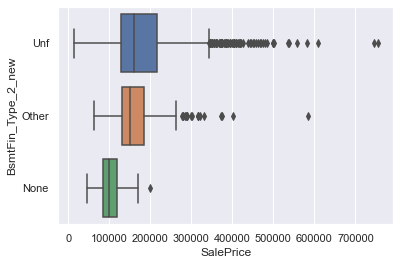

In [163]:
# BsmtFin_Type_2 - nie widac za bardzo zalezności między ceną a kategoriami tej zmiennej - tylko none sie wyroznia,
# zatem zmienione zostaływ artosci na Unf, None i  other (jako jakakolwiek aktegoria)
print(ames.BsmtFin_Type_2.value_counts())
#sns.boxplot(y='BsmtFin_Type_2',x='SalePrice',data=ames)
slownik=["None","Unf"]

ames["BsmtFin_Type_2_new"]=ames["BsmtFin_Type_2"].apply(lambda x: x if (x in slownik)  else "Other")
print(ames.BsmtFin_Type_2_new.value_counts())
sns.boxplot(y='BsmtFin_Type_2_new',x='SalePrice',data=ames)

In [164]:
#Bsmt_Cond
print(ames.Bsmt_Cond.value_counts())

ames[["Bsmt_Cond_new"]] = ames[["Bsmt_Cond"]].replace('Ex', 'Gd_Ex')
ames[["Bsmt_Cond_new"]] = ames[["Bsmt_Cond_new"]].replace('Gd', 'Gd_Ex')
ames[["Bsmt_Cond_new"]] = ames[["Bsmt_Cond_new"]].replace('Po', 'Po_Fa')
ames[["Bsmt_Cond_new"]] = ames[["Bsmt_Cond_new"]].replace('Fa', 'Po_Fa')
print(ames.Bsmt_Cond_new.value_counts())

TA      1674
Gd        82
Fa        69
None      51
Ex         3
Po         2
Name: Bsmt_Cond, dtype: int64
TA       1674
Gd_Ex      85
Po_Fa      71
None       51
Name: Bsmt_Cond_new, dtype: int64


In [165]:
#Heating - zmieniam na 2 kategorie Gas A i Other
ames.Heating.value_counts()
df = ames.Heating.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,2)
mapp_cat(ames,"Heating_new","Heating",new_categories,fill_nans=False, fill_nans_name="NANS")
ames.Heating_new.value_counts()

['GasA']


GasA     1851
Other      31
Name: Heating_new, dtype: int64

In [166]:
#Heating_QC - zmieniam na PO(1 obserwacja) na Fa
ames.Heating_QC.value_counts()
ames[["Heating_QC_new"]] = ames[["Heating_QC"]].replace('Po', 'Fa')
ames.Heating_QC_new.value_counts()

Ex    913
TA    605
Gd    303
Fa     61
Name: Heating_QC_new, dtype: int64

In [167]:
#Central_Air - bez zmian
ames.Central_Air.value_counts()


Y    1762
N     120
Name: Central_Air, dtype: int64

In [168]:
#Electrical - zmiana , wszystkie Fuse w jedną kategorie
ames.Electrical.value_counts()
Fuse_dict = ames.Electrical.str[:4] == "Fuse"
ames["Electrical_new"]=ames["Electrical"].apply(lambda x: x if not x in ames.Electrical[Fuse_dict].values else "Fuse")
ames.Electrical_new.value_counts()

SBrkr    1725
Fuse      157
Name: Electrical_new, dtype: int64

In [169]:
#Bsmt_Full_Bath  - zamieniam None na 0  i tworze kategorie more than one

ames[["Bsmt_Full_Bath_new"]] = ames[["Bsmt_Full_Bath"]].replace('None', '0')
ames[["Bsmt_Full_Bath_new"]] = ames[["Bsmt_Full_Bath_new"]].replace('3', 'Other')
ames[["Bsmt_Full_Bath_new"]] = ames[["Bsmt_Full_Bath_new"]].replace('2', 'Other')
ames.Bsmt_Full_Bath_new.value_counts()

0        1079
1         776
Other      27
Name: Bsmt_Full_Bath_new, dtype: int64

In [170]:
#Bsmt_Half_Bath zamieniam none na 0, i "2" zostawiam oddzielnie, jako małą kategorie
ames[["Bsmt_Half_Bath_new"]] = ames[["Bsmt_Half_Bath"]].replace('None', '0')
ames.Bsmt_Half_Bath_new.value_counts()


0    1753
1     125
2       4
Name: Bsmt_Half_Bath_new, dtype: int64

In [171]:
# Mało liczne skrajne kategorie 0 oraz 4
ames.Full_Bath.value_counts()

# Zobaczmy boxplot
# Tworze ekspercko 3 kategorie po Boxplotach 0 łacze z jedynka, 2 oddzielnie, i wiecej niz 3
ames[["Full_Bath_new"]] = ames[["Full_Bath"]].replace(0, '0_1')
ames[["Full_Bath_new"]] = ames[["Full_Bath_new"]].replace(1, '0_1')
ames[["Full_Bath_new"]] = ames[["Full_Bath_new"]].replace(2, '2')
ames[["Full_Bath_new"]] = ames[["Full_Bath_new"]].replace(3, '3_4')
ames[["Full_Bath_new"]] = ames[["Full_Bath_new"]].replace(4, '3_4')
ames.Full_Bath_new.value_counts()


2      944
0_1    896
3_4     42
Name: Full_Bath_new, dtype: int64

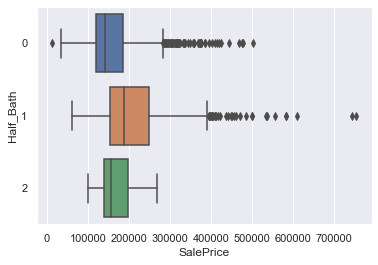

In [172]:
#Half_Bath Małe zroznicowanei zmiennej zaleznej - 3 kategorie, alezostaiwam tak jak jest
ames.Half_Bath.value_counts()
sns.boxplot(y='Half_Bath',x='SalePrice',data=ames)

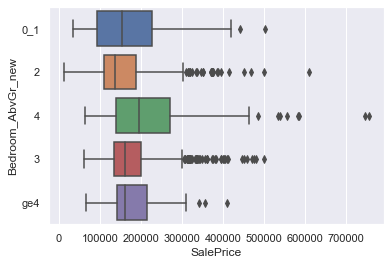

In [173]:
# Bedroom_AbvGr liczba sypialni# Mapuje: 1 lub 0, 2,3,4, powyzej 5
ames.Bedroom_AbvGr.value_counts()

ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr"]].replace(0, '0_1')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(1, '0_1')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(2, '2')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(3, '3')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(4, '4')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(5, 'ge4')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(6, 'ge4')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(7, 'ge4')
ames[["Bedroom_AbvGr_new"]] = ames[["Bedroom_AbvGr_new"]].replace(8, 'ge4')

# Bedroom_AbvGr liczba sypialni# Mapuje: 1 lub 0, 2,3,4, powyzej 5
ames.Bedroom_AbvGr_new.value_counts()

sns.boxplot(y='Bedroom_AbvGr_new',x='SalePrice',data=ames)

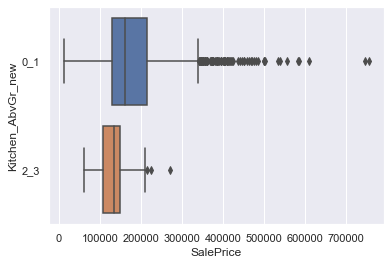

In [174]:
# Kitchen_AbvGr - zmiana na 0_1 i 2_3
ames['Kitchen_AbvGr'] = ames['Kitchen_AbvGr'].astype('category')
ames.Kitchen_AbvGr.value_counts()
ames[["Kitchen_AbvGr_new"]] = ames[["Kitchen_AbvGr"]].replace(0, '0_1')
ames[["Kitchen_AbvGr_new"]] = ames[["Kitchen_AbvGr_new"]].replace(1, '0_1')
ames[["Kitchen_AbvGr_new"]] = ames[["Kitchen_AbvGr_new"]].replace(2, '2_3')
ames[["Kitchen_AbvGr_new"]] = ames[["Kitchen_AbvGr_new"]].replace(3, '2_3')
ames.Kitchen_AbvGr_new.value_counts()

sns.boxplot(y='Kitchen_AbvGr_new',x='SalePrice',data=ames)

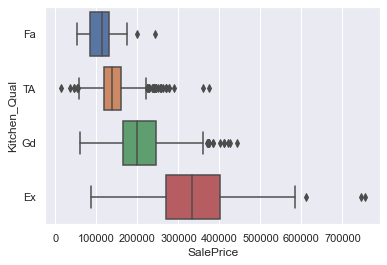

In [175]:
#Kitchen_Qual - brez zmian
# Widac zaleznosc
ames.Kitchen_Qual.value_counts()
ames['Kitchen_Qual'] = ames['Kitchen_Qual'].astype('category')
ames['Kitchen_Qual']=ames['Kitchen_Qual'].cat.reorder_categories(['Fa','TA','Gd','Ex'])
sns.boxplot(y='Kitchen_Qual',x='SalePrice',data=ames)



6     549
7     407
5     379
8     224
4     120
9      99
10     57
11     19
3      17
12     10
14      1
Name: TotRms_AbvGrd, dtype: int64


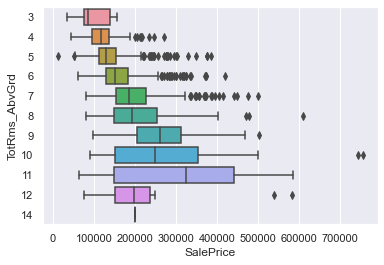

In [176]:
#TotRms_AbvGrd - 3 łącze z 4 i tworze kategorie powyzej 10
print(ames.TotRms_AbvGrd.value_counts())
ames['TotRms_AbvGrd'] = ames['TotRms_AbvGrd'].astype('category')
sns.boxplot(y='TotRms_AbvGrd',x='SalePrice',data=ames)

ames[["TotRms_AbvGrd_new"]] = ames[["TotRms_AbvGrd"]].replace(3, '3_4')
ames[["TotRms_AbvGrd_new"]] = ames[["TotRms_AbvGrd_new"]].replace(4, '3_4')

ames[["TotRms_AbvGrd_new"]] = ames[["TotRms_AbvGrd_new"]].replace(10, 'GE10')
ames[["TotRms_AbvGrd_new"]] = ames[["TotRms_AbvGrd_new"]].replace(11, 'GE10')
ames[["TotRms_AbvGrd_new"]] = ames[["TotRms_AbvGrd_new"]].replace(12, 'GE10')
ames[["TotRms_AbvGrd_new"]] = ames[["TotRms_AbvGrd_new"]].replace(14, 'GE10')


Typ     1755
Min1      44
Min2      43
Mod       21
Maj1      12
Maj2       5
Sev        2
Name: Functional, dtype: int64
['Typ', 'Min']


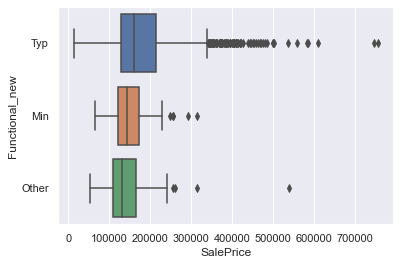

In [177]:
# Typ, Min1 z Min2 i other
print(ames.Functional.value_counts())

#sns.boxplot(y='Functional',x='SalePrice',data=ames)


ames[["Functional_new"]] = ames[["Functional"]].replace('Min1', 'Min')
ames[["Functional_new"]] = ames[["Functional_new"]].replace('Min2', 'Min')
# i reszta na other już funkcją

df = ames.Functional_new.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,3)
mapp_cat(ames,"Functional_new","Functional_new",new_categories,fill_nans=False, fill_nans_name="NANS")
ames.Functional_new.value_counts()
sns.boxplot(y='Functional_new',x='SalePrice',data=ames)

0    908
1    813
2    153
3      7
4      1
Name: Fireplaces, dtype: int64


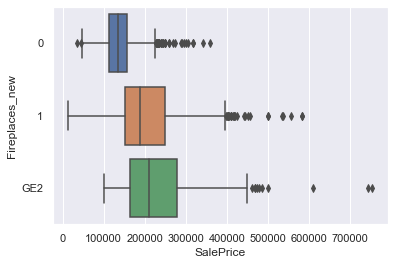

In [178]:
#Fireplaces - zmiana 2,3,4 w 1 kategorie
print(ames.Fireplaces.value_counts())
ames['Fireplaces'] = ames['Fireplaces'].astype('category')
#sns.boxplot(y='Fireplaces',x='SalePrice',data=ames)

ames[["Fireplaces_new"]] = ames[["Fireplaces"]].replace(2, 'GE2')
ames[["Fireplaces_new"]] = ames[["Fireplaces_new"]].replace(3, 'GE2')
ames[["Fireplaces_new"]] = ames[["Fireplaces_new"]].replace(4, 'GE2')
sns.boxplot(y='Fireplaces_new',x='SalePrice',data=ames)

None    908
Gd      466
TA      402
Fa       50
Po       34
Ex       22
Name: Fireplace_Qu, dtype: int64


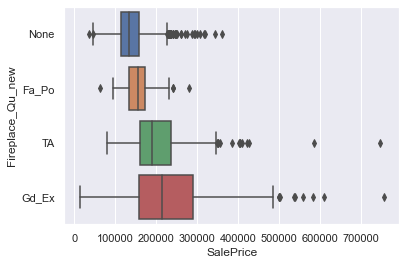

In [179]:
#Fireplace_Qu - Fa i Po razem GD i Ex razem
print(ames.Fireplace_Qu.value_counts())
#sns.boxplot(y='Fireplace_Qu',x='SalePrice',data=ames)
ames[["Fireplace_Qu_new"]] = ames[["Fireplace_Qu"]].replace('Po', 'Fa_Po')
ames[["Fireplace_Qu_new"]] = ames[["Fireplace_Qu_new"]].replace('Fa', 'Fa_Po')
ames[["Fireplace_Qu_new"]] = ames[["Fireplace_Qu_new"]].replace('Gd', 'Gd_Ex')
ames[["Fireplace_Qu_new"]] = ames[["Fireplace_Qu_new"]].replace('Ex', 'Gd_Ex')
sns.boxplot(y='Fireplace_Qu_new',x='SalePrice',data=ames)

Attchd     1113
Detchd      494
BuiltIn     115
None        106
Basment      27
2Types       15
CarPort      12
Name: Garage_Type, dtype: int64
('2Types', 153040.0)
('Attchd', 200590.0)
('Basment', 162157.0)
('BuiltIn', 254690.0)
('CarPort', 101921.0)
('Detchd', 130535.0)
('None', 107721.0)


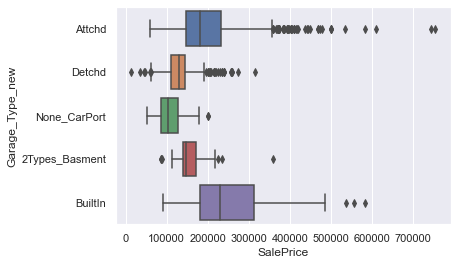

In [180]:
#Garage_Type
print(ames.Garage_Type.value_counts())
#sns.boxplot(y='Garage_Type',x='SalePrice',data=ames)

groupby_garage = ames.groupby('Garage_Type')
for Garage_Type, value in groupby_garage['SalePrice']:
    print((Garage_Type, round(value.mean())))
# 2 types i Basement możemy  połączyc, car port i none podobny rozklad

ames[["Garage_Type_new"]] = ames[["Garage_Type"]].replace('2Types', '2Types_Basment')
ames[["Garage_Type_new"]] = ames[["Garage_Type_new"]].replace('Basment', '2Types_Basment')

ames[["Garage_Type_new"]] = ames[["Garage_Type_new"]].replace('None', 'None_CarPort')
ames[["Garage_Type_new"]] = ames[["Garage_Type_new"]].replace('CarPort', 'None_CarPort')

sns.boxplot(y='Garage_Type_new',x='SalePrice',data=ames)

Unf     805
RFn     524
Fin     445
None    106
Name: Garage_Finish, dtype: int64


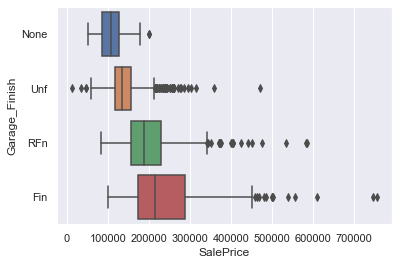

In [181]:
#Garage_Finish - 4 typy,bez zmian
print(ames.Garage_Finish.value_counts())
sns.boxplot(y='Garage_Finish',x='SalePrice',data=ames)

2       1001
1        529
3        235
0        106
4          9
None       1
5          1
Name: Garage_Cars, dtype: int64
2        1001
1         529
3         235
0         107
Other      10
Name: Garage_Cars_new, dtype: int64


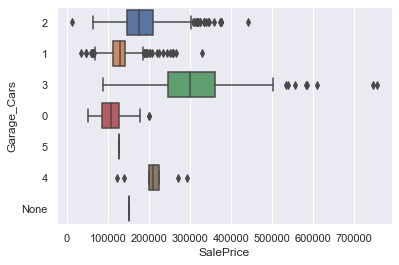

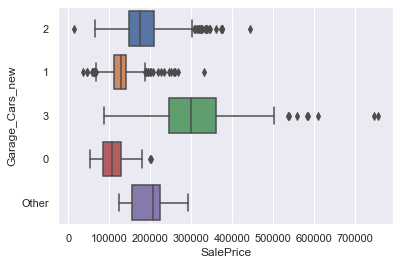

In [182]:
#Garage_Cars - none na 0, 4 i 5 na other, rozklad pokazuje ze nie bardzo to mozna z 3 polaczyc
print(ames.Garage_Cars.value_counts())
sns.boxplot(y='Garage_Cars',x='SalePrice',data=ames)

ames[["Garage_Cars_new"]] = ames[["Garage_Cars"]].replace('None', '0')
ames[["Garage_Cars_new"]] = ames[["Garage_Cars_new"]].replace('4', 'Other')
ames[["Garage_Cars_new"]] = ames[["Garage_Cars_new"]].replace('5', 'Other')
print(ames.Garage_Cars_new.value_counts())
plt.figure()
sns.boxplot(y='Garage_Cars_new',x='SalePrice',data=ames)


TA      1674
None     107
Fa        82
Gd        15
Po         2
Ex         1
Name: Garage_Qual, dtype: int64
TA       1674
None      107
Fa_Po      84
Gd_Ex      16
Name: Garage_Qual_new, dtype: int64


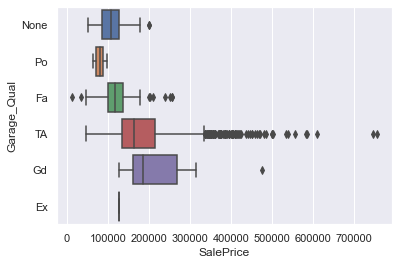

In [183]:
#Garage_Qual - Po z Fa i Ex z Gd
print(ames.Garage_Qual.value_counts())
sns.boxplot(y='Garage_Qual',x='SalePrice',data=ames)
ames[["Garage_Qual_new"]] = ames[["Garage_Qual"]].replace('Po', 'Fa_Po')
ames[["Garage_Qual_new"]] = ames[["Garage_Qual_new"]].replace('Fa', 'Fa_Po')
ames[["Garage_Qual_new"]] = ames[["Garage_Qual_new"]].replace('Gd', 'Gd_Ex')
ames[["Garage_Qual_new"]] = ames[["Garage_Qual_new"]].replace('Ex', 'Gd_Ex')

print(ames.Garage_Qual_new.value_counts())

TA      1704
None     107
Fa        52
Gd         9
Po         7
Ex         2
Name: Garage_Cond, dtype: int64


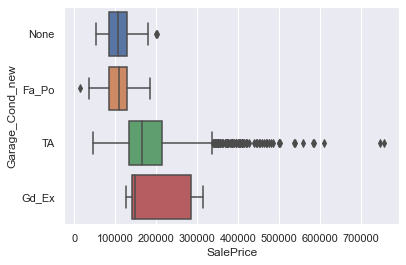

In [184]:
#Garage_Cond
print(ames.Garage_Cond.value_counts())
#sns.boxplot(y='Garage_Cond',x='SalePrice',data=ames)

ames[["Garage_Cond_new"]] = ames[["Garage_Cond"]].replace('Po', 'Fa_Po')
ames[["Garage_Cond_new"]] = ames[["Garage_Cond_new"]].replace('Fa', 'Fa_Po')
ames[["Garage_Cond_new"]] = ames[["Garage_Cond_new"]].replace('Gd', 'Gd_Ex')
ames[["Garage_Cond_new"]] = ames[["Garage_Cond_new"]].replace('Ex', 'Gd_Ex')
sns.boxplot(y='Garage_Cond_new',x='SalePrice',data=ames)


Y    1700
N     136
P      46
Name: Paved_Drive, dtype: int64


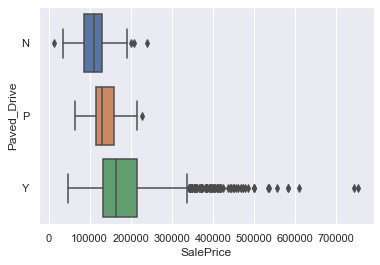

In [185]:
#Paved_Drive - bez zmian

print(ames.Paved_Drive.value_counts())

sns.boxplot(y='Paved_Drive',x='SalePrice',data=ames)

In [186]:
# Tylko podział na none i other

print(ames.Pool_QC.value_counts())

ames.Pool_QC.value_counts()
df = ames.Pool_QC.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,2)
mapp_cat(ames,"Pool_QC_new","Pool_QC",new_categories,fill_nans=False, fill_nans_name="NANS")
ames.Pool_QC_new.value_counts()


None    1871
Gd         4
Ex         3
TA         2
Fa         2
Name: Pool_QC, dtype: int64
['None']


None     1871
Other      11
Name: Pool_QC_new, dtype: int64

None     1489
MnPrv     232
GdPrv      78
GdWo       76
MnWw        7
Name: Fence, dtype: int64


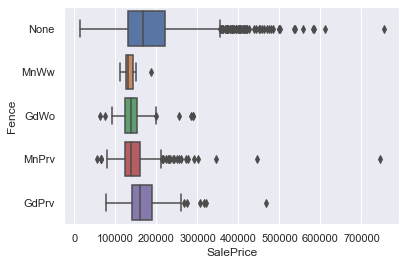

In [187]:
#Fence - brak zmian MnPrv ewentualnie z MnWw, ale nie są to kategorie następujące po sobie
print(ames.Fence.value_counts())
sns.boxplot(y='Fence',x='SalePrice',data=ames)


None    1810
Shed      67
Othr       2
Gar2       2
TenC       1
Name: Misc_Feature, dtype: int64
['None']


None     1810
Other      72
Name: Misc_Feature_new, dtype: int64

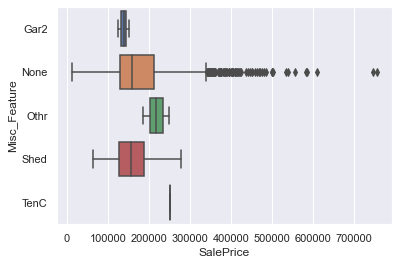

In [188]:
# Dodatkowe cechy - wrzucone wszystkie poza none do 1 kategorii
print(ames.Misc_Feature.value_counts())
sns.boxplot(y='Misc_Feature',x='SalePrice',data=ames)

ames.Misc_Feature.value_counts()
df = ames.Misc_Feature.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,1)
mapp_cat(ames,"Misc_Feature_new","Misc_Feature",new_categories,fill_nans=False, fill_nans_name="NANS")
ames.Misc_Feature_new.value_counts()

(1, 198511.0)
(2, 173504.0)
(3, 177042.0)
(4, 163978.0)
(5, 166818.0)
(6, 181093.0)
(7, 185815.0)
(8, 180250.0)
(9, 187755.0)
(10, 178567.0)
(11, 187440.0)
(12, 177281.0)
6     330
7     289
5     240
4     184
3     150
8     149
9     109
10    104
11     90
2      89
1      79
12     69
Name: Mo_Sold, dtype: int64


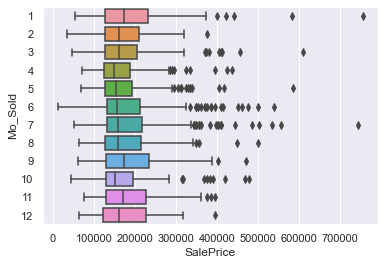

In [189]:
sns.boxplot(y='Mo_Sold',x='SalePrice',data=ames)
# czy mth sprzedazy ma wplyw na wyskokosc sprzedazy
groupby_Mo_Sold = ames.groupby('Mo_Sold')
for Mo_Sold, value in groupby_Mo_Sold['SalePrice']:
    print((Mo_Sold, round(value.mean())))
print(ames.Mo_Sold.value_counts())
# raczej nie widać zeby roznicował zbytnio mth sprzedazy, ale wiecej 
# mieszkan sprzedaje sie w srodku roku niż na konic czy na poczatek

(2006, 181027.0)
(2007, 182930.0)
(2008, 174231.0)
(2009, 179001.0)
(2010, 173350.0)


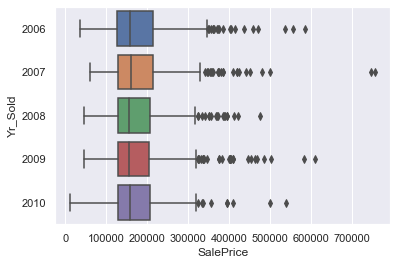

In [190]:
sns.boxplot(y='Yr_Sold',x='SalePrice',data=ames)

groupby_Yr_Sold = ames.groupby('Yr_Sold')
for Yr_Sold, value in groupby_Yr_Sold['SalePrice']:
    print((Yr_Sold, round(value.mean())))
# tym bardziej brak zaleznosci

WD       1658
New       124
COD        62
ConLD      12
ConLI       9
CWD         7
ConLw       4
Oth         3
Con         2
VWD         1
Name: Sale_Type, dtype: int64
WD     1666
New     124
COD      62
Con      27
Oth       3
Name: Sale_Type_new, dtype: int64


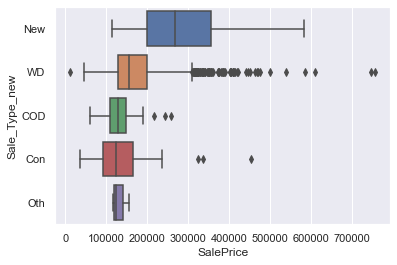

In [191]:
#Sale_Type
print(ames.Sale_Type.value_counts())
#sns.boxplot(y='Sale_Type',x='SalePrice',data=ames)
# Łącze warranty i kontraktowe w jedno

ames[["Sale_Type_new"]] = ames[["Sale_Type"]].replace('CWD', 'WD')
ames[["Sale_Type_new"]] = ames[["Sale_Type_new"]].replace('VWD', 'WD')
ames[["Sale_Type_new"]] = ames[["Sale_Type_new"]].replace('WD ', 'WD')
ames[["Sale_Type_new"]] = ames[["Sale_Type_new"]].replace('ConLD', 'Con')
ames[["Sale_Type_new"]] = ames[["Sale_Type_new"]].replace('ConLI', 'Con')
ames[["Sale_Type_new"]] = ames[["Sale_Type_new"]].replace('ConLw', 'Con')


print(ames.Sale_Type_new.value_counts())
sns.boxplot(y='Sale_Type_new',x='SalePrice',data=ames)

Normal     1565
Partial     127
Abnorml     127
Family       33
Alloca       19
AdjLand      11
Name: Sale_Condition, dtype: int64
['Normal', 'Partial', 'Abnorml']
Normal     1565
Partial     127
Abnorml     127
Other        63
Name: Sale_Condition_new, dtype: int64


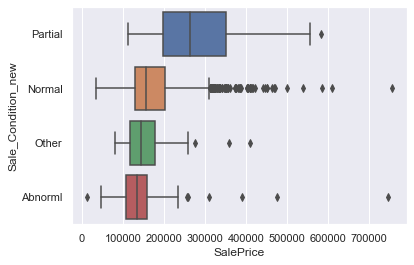

In [192]:
#Sale_Condition

print(ames.Sale_Condition.value_counts())
#sns.boxplot(y='Sale_Condition',x='SalePrice',data=ames)


df = ames.Sale_Condition.value_counts().rename_axis('unique_values').reset_index(name='counts')
list_of_names = df['unique_values'].to_list()
list_of_values= df['counts'].to_list()
new_categories = number_of_categories(list_of_names,list_of_values,50,6)
mapp_cat(ames,"Sale_Condition_new","Sale_Condition",new_categories,fill_nans=False, fill_nans_name="NANS")
print(ames.Sale_Condition_new.value_counts())
sns.boxplot(y='Sale_Condition_new',x='SalePrice',data=ames)



In [366]:
for col in ames.columns:
        print(col)

MS_SubClass
MS_Zoning
Lot_Frontage
Lot_Area
Street
Alley
Lot_Shape
Land_Contour
Lot_Config
Land_Slope
Neighborhood
Condition_1
Condition_2
Bldg_Type
House_Style
Overall_Qual
Overall_Cond
Roof_Style
Roof_Matl
Exterior_1st
Exterior_2nd
Mas_Vnr_Type
Mas_Vnr_Area
Exter_Qual
Exter_Cond
Foundation
Bsmt_Qual
Bsmt_Cond
Bsmt_Exposure
BsmtFin_Type_1
BsmtFin_SF_1
BsmtFin_Type_2
BsmtFin_SF_2
Bsmt_Unf_SF
Total_Bsmt_SF
Heating
Heating_QC
Central_Air
Electrical
X1st_Flr_SF
X2nd_Flr_SF
Low_Qual_Fin_SF
Gr_Liv_Area
Bsmt_Full_Bath
Bsmt_Half_Bath
Full_Bath
Half_Bath
Bedroom_AbvGr
Kitchen_AbvGr
Kitchen_Qual
TotRms_AbvGrd
Functional
Fireplaces
Fireplace_Qu
Garage_Type
Garage_Yr_Blt
Garage_Finish
Garage_Cars
Garage_Area
Garage_Qual
Garage_Cond
Paved_Drive
Wood_Deck_SF
Open_Porch_SF
Enclosed_Porch
X3Ssn_Porch
Screen_Porch
Pool_Area
Pool_QC
Fence
Misc_Feature
Misc_Val
Mo_Sold
Yr_Sold
Sale_Type
Sale_Condition
age
years_from_remod_add
Garage_age
SalePrice
MS_SubClass_new
Neighborhood_new
Condition_1_new
Conditio

In [205]:
ames.to_pickle('ames.pkl')    #to save the dataframe, 


In [3]:
ames = pd.read_pickle('ames.pkl') #to load 

__Zmienne kategoryczne sprzed poprawek w kategoryzacji - zmienne oryginalne usuwam z bazy__

In [4]:
ames_final = ames

In [5]:
ames_final.drop(["Full_Bath","Bedroom_AbvGr","Kitchen_AbvGr","TotRms_AbvGrd","Functional","Fireplaces","Fireplace_Qu",
"Garage_Type","Garage_Cars","Garage_Qual","Garage_Cond","Pool_QC","Misc_Feature","Sale_Type","Sale_Condition","MS_SubClass",
"Neighborhood","Condition_1","Condition_2","House_Style","Roof_Style","Roof_Matl","Exterior_1st","Exterior_2nd","Mas_Vnr_Type",
"Foundation","Bsmt_Cond","BsmtFin_Type_2","Heating","Electrical","Bsmt_Full_Bath","Bsmt_Half_Bath","Bsmt_Cond"],axis=1,inplace=True)

In [ ]:
# Analiza Missingow

In [6]:
null_counts = ames_final.isnull().sum()
null_counts[null_counts > 0]

Mas_Vnr_Area           11
Bsmt_Qual               1
Bsmt_Exposure           2
BsmtFin_Type_1          1
Total_Bsmt_SF           1
Garage_Yr_Blt         108
Garage_Finish           2
Garage_age            108
Bsmt_Cond_new           1
BsmtFin_Type_2_new      2
Garage_Qual_new         1
Garage_Cond_new         1
dtype: int64

In [7]:
# Wiek garazu usuwam rowniez, malo istotna zmienna sie wydaje + ma duzo missingow
ames_final = ames_final.drop(["Garage_Yr_Blt","Garage_age"],axis=1)


__Obsługa Missingow__

In [8]:
# Mas_Vnr_Area 
median = ames_final['Mas_Vnr_Area'].median()
ames_final['Mas_Vnr_Area'].fillna(median, inplace=True)

In [9]:
#Bsmt_Qual - zamiana na None
ames_final['Bsmt_Qual'].fillna("None", inplace=True)
print(ames_final.Bsmt_Qual.value_counts())

TA      879
Gd      750
Ex      147
Fa       54
None     52
Name: Bsmt_Qual, dtype: int64


In [10]:
#Bsmt_Exposure
ames_final['Bsmt_Exposure'].fillna("None", inplace=True)
print(ames_final.Bsmt_Exposure.value_counts())

No      1218
Av       268
Gd       188
Mn       155
None      53
Name: Bsmt_Exposure, dtype: int64


In [11]:
#BsmtFin_Type_1
ames_final['BsmtFin_Type_1'].fillna("None", inplace=True)
print(ames_final.BsmtFin_Type_1.value_counts())


GLQ     526
Unf     516
ALQ     290
Rec     200
BLQ     192
LwQ     106
None     52
Name: BsmtFin_Type_1, dtype: int64


In [12]:
#Total_Bsmt_SF           
median = ames_final['Total_Bsmt_SF'].median()
ames_final['Total_Bsmt_SF'].fillna(median, inplace=True)

In [13]:
#Garage_Finish
ames_final['Garage_Finish'].fillna("None", inplace=True)
print(ames_final.Garage_Finish.value_counts())

Unf     805
RFn     524
Fin     445
None    108
Name: Garage_Finish, dtype: int64


In [14]:
#Garage_Cond
ames_final['Garage_Cond_new'].fillna("None", inplace=True)
print(ames_final.Garage_Cond_new.value_counts())

TA       1704
None      108
Fa_Po      59
Gd_Ex      11
Name: Garage_Cond_new, dtype: int64


In [15]:
#Bsmt_Cond_new
ames_final['Bsmt_Cond_new'].fillna("None", inplace=True)
print(ames_final.Bsmt_Cond_new.value_counts())

TA       1674
Gd_Ex      85
Po_Fa      71
None       52
Name: Bsmt_Cond_new, dtype: int64


In [16]:
#BsmtFin_Type_2_new    
ames_final['BsmtFin_Type_2_new'].fillna("None", inplace=True)
print(ames_final.BsmtFin_Type_2_new.value_counts())

Unf      1581
Other     248
None       53
Name: BsmtFin_Type_2_new, dtype: int64


In [17]:
#Garage_Qual_new
print(ames_final.Garage_Qual_new.value_counts())
ames_final['Garage_Qual_new'].fillna("None", inplace=True)

TA       1674
None      107
Fa_Po      84
Gd_Ex      16
Name: Garage_Qual_new, dtype: int64


In [18]:
#Garage_Qual_new
print(ames_final.Garage_Cond_new.value_counts())
ames_final['Garage_Cond_new'].fillna("None", inplace=True)

TA       1704
None      108
Fa_Po      59
Gd_Ex      11
Name: Garage_Cond_new, dtype: int64


In [19]:
#Baza oczyszczona z nulli
null_counts = ames_final.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

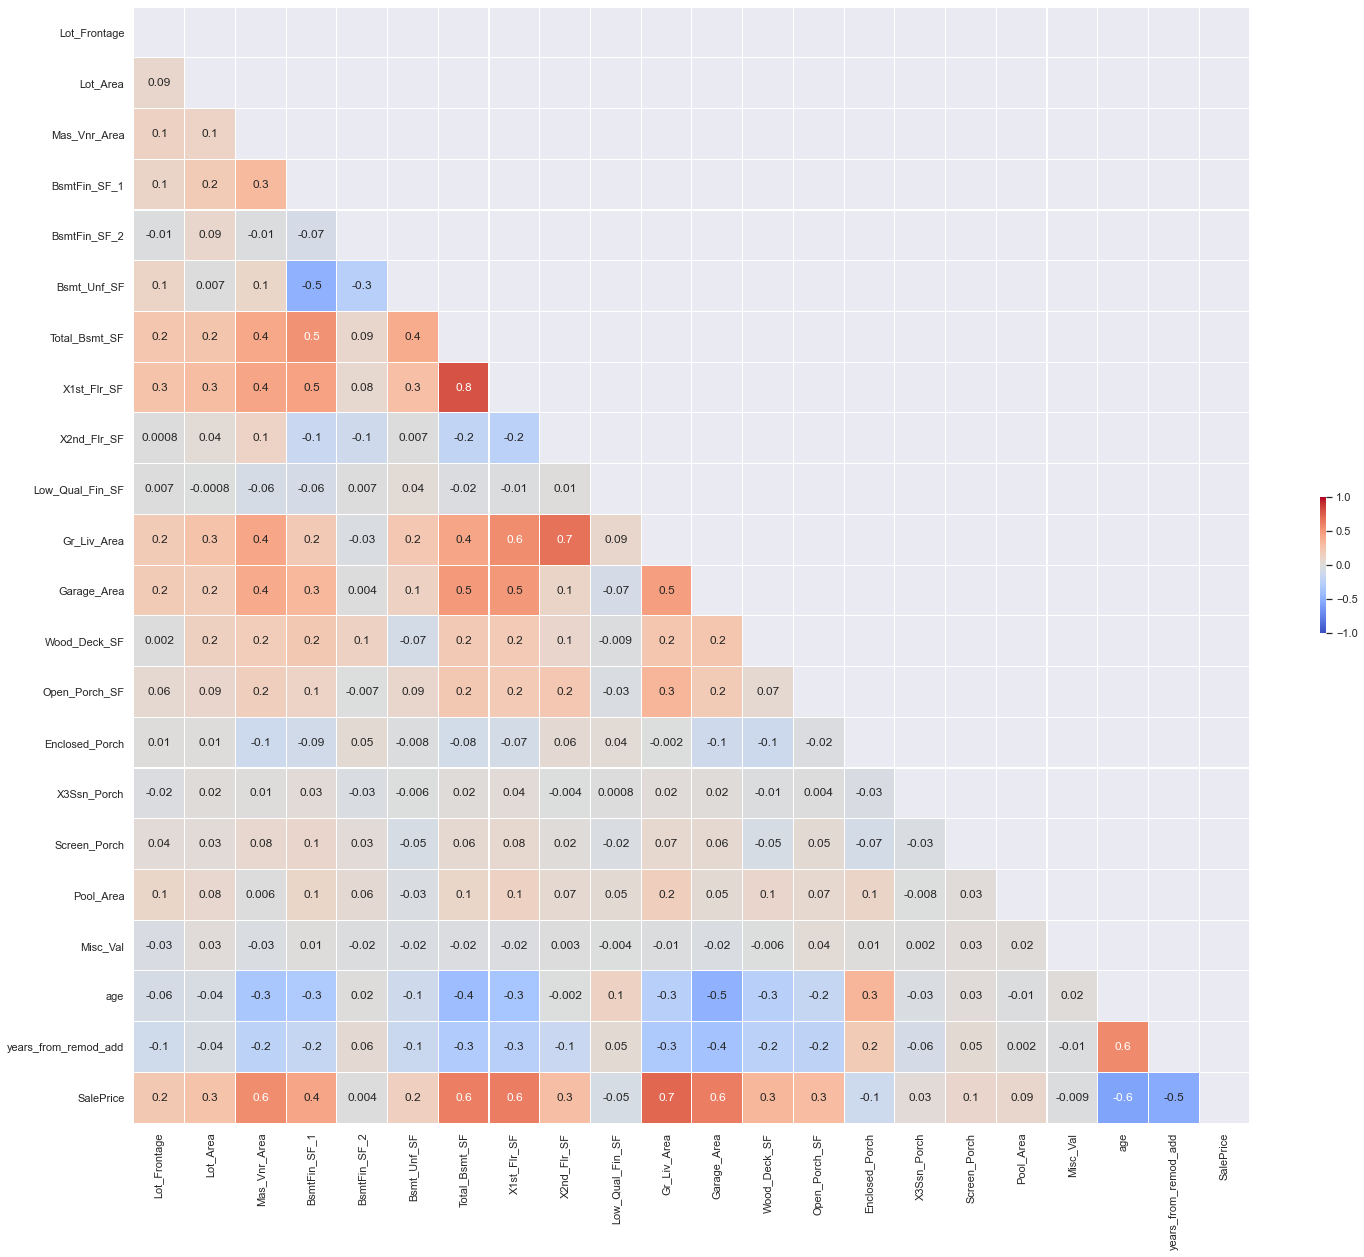

In [20]:
# Macierz korelacji dla zmiennych ciaglych

sns.set(style="darkgrid")

corr = ames_final.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.1, cbar_kws={"shrink": .1}, ax=ax,annot=True, fmt='.1g',vmin=-1, center= 0)
plt.show()

In [21]:
ames_final.corr().abs()

,Lot_Frontage,Lot_Area,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,X1st_Flr_SF,X2nd_Flr_SF,Low_Qual_Fin_SF,...,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,X3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,age,years_from_remod_add,SalePrice
Lot_Frontage,1.000000,0.092028,0.141956,0.114133,0.012463,0.122982,0.237475,0.263137,0.000791,0.007411,...,0.002158,0.062963,0.013098,0.016416,0.036041,0.108415,0.034418,0.055319,0.097319,0.221339
Lot_Area,0.092028,1.000000,0.129034,0.197929,0.086910,0.007304,0.249548,0.299749,0.040305,0.000805,...,0.154132,0.094314,0.012779,0.016588,0.032501,0.078685,0.029349,0.044765,0.044219,0.260987
Mas_Vnr_Area,0.141956,0.129034,1.000000,0.312861,0.009822,0.103183,0.425988,0.438410,0.132256,0.058499,...,0.181564,0.169465,0.109719,0.011117,0.082262,0.005912,0.026584,0.339130,0.218758,0.559307
BsmtFin_SF_1,0.114133,0.197929,0.312861,1.000000,0.068585,0.477299,0.534407,0.456680,0.147954,0.064855,...,0.221335,0.127740,0.092740,0.034398,0.097594,0.109212,0.011040,0.300436,0.164153,0.444853
BsmtFin_SF_2,0.012463,0.086910,0.009822,0.068585,1.000000,0.251522,0.087299,0.076795,0.104743,0.006555,...,0.137616,0.006825,0.049970,0.028662,0.034568,0.055259,0.015073,0.015584,0.056044,0.003746
Bsmt_Unf_SF,0.122982,0.007304,0.103183,0.477299,0.251522,1.000000,0.404499,0.288040,0.006692,0.044789,...,0.072955,0.092826,0.008072,0.006054,0.051114,0.030097,0.024156,0.106177,0.140532,0.157824
Total_Bsmt_SF,0.237475,0.249548,0.425988,0.534407,0.087299,0.404499,1.000000,0.797542,0.190617,0.019870,...,0.214129,0.223792,0.084214,0.017983,0.064608,0.106364,0.018983,0.413689,0.289536,0.624207
X1st_Flr_SF,0.263137,0.299749,0.438410,0.456680,0.076795,0.288040,0.797542,1.000000,0.226694,0.011445,...,0.209283,0.207595,0.071946,0.036760,0.075117,0.140909,0.020358,0.345544,0.255294,0.630399
X2nd_Flr_SF,0.000791,0.040305,0.132256,0.147954,0.104743,0.006692,0.190617,0.226694,1.000000,0.010826,...,0.100088,0.229030,0.057687,0.004234,0.020527,0.067763,0.002514,0.001768,0.145363,0.294706
Low_Qual_Fin_SF,0.007411,0.000805,0.058499,0.064855,0.006555,0.044789,0.019870,0.011445,0.010826,1.000000,...,0.008806,0.026485,0.044054,0.000799,0.024375,0.049973,0.003865,0.133236,0.053724,0.049505


In [22]:
# Create correlation matrix
corr_matrix = ames_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
#to_drop = [ for column in upper.columns if any(upper[column] > 0.5)]
#to_drop = [row for row in upper.rows if bool(upper['SalePrice'] > 0.5)]
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

In [23]:
#Korelacja ze zmienną zależną mniejsza niż 0.5
Index_label = upper[upper['SalePrice']<0.5].index.tolist() 

In [24]:
Index_label

['Lot_Frontage',
 'Lot_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'X2nd_Flr_SF',
 'Low_Qual_Fin_SF',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 'X3Ssn_Porch',
 'Screen_Porch',
 'Pool_Area',
 'Misc_Val']

In [25]:
#Wyrzucenie zmiennych, ktore sa skorelowane mniej niz 50%
ames_final.drop(Index_label, axis=1, inplace=True)

In [26]:
ames_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MS_Zoning             1882 non-null   category
 1   Street                1882 non-null   object  
 2   Alley                 1882 non-null   object  
 3   Lot_Shape             1882 non-null   category
 4   Land_Contour          1882 non-null   object  
 5   Lot_Config            1882 non-null   object  
 6   Land_Slope            1882 non-null   category
 7   Bldg_Type             1882 non-null   object  
 8   Overall_Qual          1882 non-null   category
 9   Overall_Cond          1882 non-null   category
 10  Mas_Vnr_Area          1882 non-null   float64 
 11  Exter_Qual            1882 non-null   category
 12  Exter_Cond            1882 non-null   category
 13  Bsmt_Qual             1882 non-null   category
 14  Bsmt_Exposure         1882 non-null   category
 15  Bsmt

#Dzielimy na dwa zbiory - kategoryczne i numeryczne

In [27]:
character_features=[x for x in ames_final.columns if ames_final[x].dtype!=np.int64 and ames_final[x].dtype != np.float64]

In [28]:
ames_final_no_dep_var = ames_final.drop("SalePrice",axis=1)

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = ames_final_no_dep_var.select_dtypes(include=numerics)
numerical_features=numerical_df.columns

In [30]:
# stworzenie dla zmiennych kategorycznych zmiennych 0-1

ames_final_2 = pd.get_dummies(
    ames_final[ames_final.columns]
)

In [31]:
for col in ames_final_2.columns:
        print(col)

Mas_Vnr_Area
Total_Bsmt_SF
X1st_Flr_SF
Gr_Liv_Area
Garage_Area
age
years_from_remod_add
SalePrice
MS_Zoning_RH
MS_Zoning_RL
MS_Zoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_None
Alley_Pave
Lot_Shape_IR3
Lot_Shape_IR2
Lot_Shape_IR1
Lot_Shape_Reg
Land_Contour_Bnk
Land_Contour_HLS
Land_Contour_Low
Land_Contour_Lvl
Lot_Config_Corner
Lot_Config_CulDSac
Lot_Config_FR2
Lot_Config_FR3
Lot_Config_Inside
Land_Slope_Sev
Land_Slope_Mod
Land_Slope_Gtl
Bldg_Type_1Fam
Bldg_Type_2fmCon
Bldg_Type_Duplex
Bldg_Type_Twnhs
Bldg_Type_TwnhsE
Overall_Qual_1
Overall_Qual_2
Overall_Qual_3
Overall_Qual_4
Overall_Qual_5
Overall_Qual_6
Overall_Qual_7
Overall_Qual_8
Overall_Qual_9
Overall_Qual_10
Overall_Cond_1
Overall_Cond_2
Overall_Cond_3
Overall_Cond_4
Overall_Cond_5
Overall_Cond_6
Overall_Cond_7
Overall_Cond_8
Overall_Cond_9
Exter_Qual_Fa
Exter_Qual_TA
Exter_Qual_Gd
Exter_Qual_Ex
Exter_Cond_Fa
Exter_Cond_TA
Exter_Cond_Gd
Exter_Cond_Ex
Bsmt_Qual_None
Bsmt_Qual_Fa
Bsmt_Qual_TA
Bsmt_Qual_Gd
Bsmt_Qual_Ex
Bsmt_

In [32]:
?pd.get_dummies

# BUDOWA MODELU

In [33]:
# Podział proby na treningową i testową
from sklearn.model_selection import train_test_split
ames_train, ames_test = train_test_split(ames_final_2,test_size=0.1)

In [34]:
ames_train

,Mas_Vnr_Area,Total_Bsmt_SF,X1st_Flr_SF,Gr_Liv_Area,Garage_Area,age,years_from_remod_add,SalePrice,MS_Zoning_RH,MS_Zoning_RL,...,Misc_Feature_new_Other,Sale_Type_new_COD,Sale_Type_new_Con,Sale_Type_new_New,Sale_Type_new_Oth,Sale_Type_new_WD,Sale_Condition_new_Abnorml,Sale_Condition_new_Normal,Sale_Condition_new_Other,Sale_Condition_new_Partial
1732,0.0,850.0,960,960,576.0,84,30,103000,0,0,...,0,0,0,0,0,1,0,1,0,0
992,251.0,1602.0,1626,1626,534.0,16,16,226500,0,1,...,0,0,0,0,0,1,0,1,0,0
785,0.0,798.0,798,1640,595.0,7,7,183000,0,1,...,0,0,0,0,0,1,0,1,0,0
1330,183.0,1240.0,1632,1632,338.0,52,22,139000,0,1,...,0,0,0,0,0,1,0,1,0,0
1442,0.0,1063.0,1287,1287,576.0,51,4,162000,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.0,738.0,738,1476,540.0,5,5,173500,0,1,...,0,0,0,0,0,1,0,1,0,0
919,0.0,742.0,779,935,308.0,80,50,79500,0,0,...,1,0,0,0,0,1,0,1,0,0
453,318.0,858.0,858,1716,490.0,48,48,171000,0,1,...,0,0,0,0,0,1,0,1,0,0
528,0.0,1055.0,1055,1845,462.0,18,18,189000,0,1,...,1,0,0,0,0,1,0,1,0,0


In [35]:
ames_train[numerical_features].describe().round(2)

,Mas_Vnr_Area,Total_Bsmt_SF,X1st_Flr_SF,Gr_Liv_Area,Garage_Area,age,years_from_remod_add
count,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00
mean,97.61,1051.23,1165.74,1492.92,467.12,40.30,26.96
std,173.27,436.68,383.74,511.23,217.87,29.19,20.71
min,0.00,0.00,407.00,407.00,0.00,0.00,0.00
25%,0.00,803.00,882.00,1111.00,308.00,12.00,7.00
50%,0.00,994.00,1092.00,1440.00,473.00,40.00,20.00
75%,153.00,1292.00,1403.00,1734.00,576.00,57.00,46.00
max,1290.00,6110.00,4692.00,5642.00,1488.00,138.00,60.00


In [53]:
#Podział prob  na zmienna zalezna i niezalezna

X_train = ames_train.drop(["SalePrice"],axis=1)
y_train =ames_train["SalePrice"]

X_test = ames_test.drop(["SalePrice"],axis=1)
y_test =ames_test["SalePrice"]


In [37]:
character_features=[x for x in ames_final_2.columns if ames_final_2[x].dtype!=np.int64 and ames_final_2[x].dtype != np.float64]
ames_final_no_dep_var = ames_final_2.drop("SalePrice",axis=1)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = ames_final_no_dep_var.select_dtypes(include=numerics)
numerical_features=numerical_df.columns

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [48]:
#Numeryczne i kategoryczne pipeliney
numeric_pipeline = Pipeline([
    ("inputer",SimpleImputer(strategy="constant",fill_value=0)), #transformuje zmienną i ew braki danych uzupełnia 0 (to akurat zrobilem sam)
    ("scaler",StandardScaler())#skalowanie
]
)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))#transformuje zmienną i ew braki danych uzupełnia najczestsza (to akurat zrobilem sam)
])

In [49]:
# Definicja preprocesora - w zasadzie poza standard scalerem touzupelnienie danych niepotrzebne - i tak zmienne 0-1
preprocessor = ColumnTransformer(transformers=[
    ("character_features",categorical_pipeline,character_features)
    ,("numerical_features",numeric_pipeline,numerical_features)
])


In [50]:
# Proba regresji liniowej

LR = Pipeline(steps=[
    ('prep', preprocessor),
    ("LinearRegression",linear_model.LinearRegression())
])

In [42]:
LR.steps

[('prep',
  ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                    transformer_weights=None,
                    transformers=[('character_features',
                                   Pipeline(memory=None,
                                            steps=[('imputer',
                                                    SimpleImputer(add_indicator=False,
                                                                  copy=True,
                                                                  fill_value=None,
                                                                  missing_values=nan,
                                                                  strategy='most_frequent',
                                                                  verbose=0))],
                                            verbose=False),
                                   ['MS_Zoning_RH', 'MS_Zoning_RL',
                                    'MS_Zoning_RM', 'Str...
 

In [ ]:
LinearRegression

In [73]:
LR2 = LR.fit(X_train, y_train)

In [71]:
y_train

1732    103000
992     226500
785     183000
1330    139000
1442    162000
         ...  
442     173500
919      79500
453     171000
528     189000
324     203000
Name: SalePrice, Length: 1693, dtype: int64

In [77]:
r2_score(y_test,LR2.predict(X_test))

-4.0464805338494937e+21

In [67]:
r2_score(y_test,LR2.predict(X_test)

SyntaxError: unexpected EOF while parsing (<ipython-input-67-c1cdd4dda165>, line 1)

In [68]:
LR2.score(X_test, y_test)

-4.0464805338494937e+21

In [52]:
LR.predict(X_test)

array([ 1.75392000e+05,  1.06080000e+05,  1.27488000e+05,  1.11488000e+05,
        1.79072000e+05,  1.52704000e+05,  1.52128000e+05,  1.13344000e+05,
        2.02432000e+05,  2.85632000e+05,  1.88256000e+05,  2.08384000e+05,
        1.16384000e+05,  1.50464000e+05,  1.24320000e+05,  2.08960000e+05,
        2.36096000e+05,  1.57440000e+05,  1.58624000e+05,  3.96960000e+05,
        1.80608000e+05,  1.49248000e+05,  1.27456000e+05,  1.73696000e+05,
        1.42336000e+05,  1.09632000e+05,  1.78912000e+05,  1.95264000e+05,
        1.31008000e+05,  1.57312000e+05,  1.98752000e+05,  1.27040000e+05,
        1.63072000e+05,  1.23456000e+05,  1.43776000e+05,  3.77728000e+05,
        9.46240000e+04,  2.19552000e+05,  1.30080000e+05,  1.99488000e+05,
        1.42688000e+05,  1.45344000e+05,  1.25728000e+05,  1.54080000e+05,
        2.23040000e+05,  1.45152000e+05,  1.24032000e+05,  1.06848000e+05,
        1.49952000e+05,  1.34496000e+05,  1.10272000e+05,  2.35232000e+05,
        2.37408000e+05,  

In [58]:
#Proba XGBoosta
from xgboost.sklearn import XGBRegressor


In [536]:
Regressor = make_pipeline(preprocessor,XGBRegressor(learning_rate=0.03))

In [537]:
Regressor.steps

[('columntransformer',
  ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                    transformer_weights=None,
                    transformers=[('character_features',
                                   Pipeline(memory=None,
                                            steps=[('imputer',
                                                    SimpleImputer(add_indicator=False,
                                                                  copy=True,
                                                                  fill_value=None,
                                                                  missing_values=nan,
                                                                  strategy='most_frequent',
                                                                  verbose=0))],
                                            verbose=False),
                                   ['MS_Zoning_RH', 'MS_Zoning_RL',
                                    'MS_Zoning_R

In [538]:
Regressor.fit(X_train,y_train)
#classifier.predict(X_test)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('character_features',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                  

In [539]:
mean_squared_error(y_train,Regressor.predict(X_train))

293932934.79774195

In [56]:
#Proba lasu regresyjnego
from sklearn.ensemble import RandomForestRegressor 

In [471]:
 classifier_RF=make_pipeline(preprocessor,RandomForestRegressor(n_estimators = 100, random_state = 0))

In [472]:
classifier_RF.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('character_features',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                  

In [482]:
mean_squared_error(y_train,classifier_RF.predict(X_train))

96584215.39212503

# Analiza modeli

In [60]:
from xgboost.sklearn import XGBRegressor
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

LR
-4.0464805338494937e+21
387822851173505.2
1.9246024803913479e+31
----------


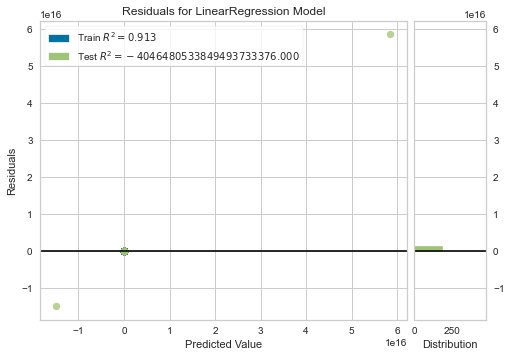

Lasso Ridge
0.9298261690896553
14530.155459644766
333763446.77514213
----------


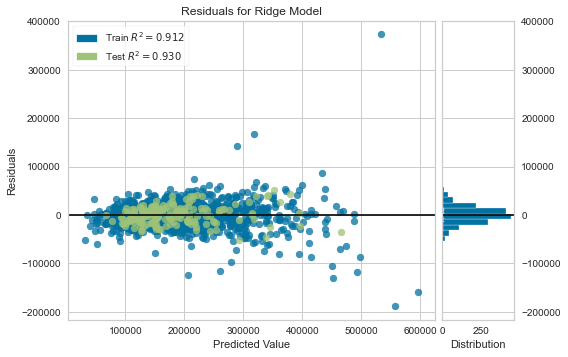

Random Forrest
0.9305915622084077
12824.783862433862
330123054.8777815
----------


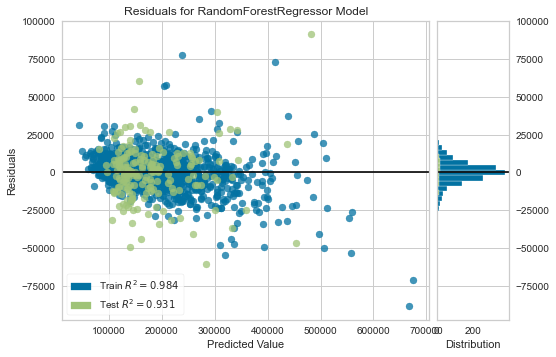

XG Boost
[01:37:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9074333131763738
14592.144634589948
440269200.7834243
----------


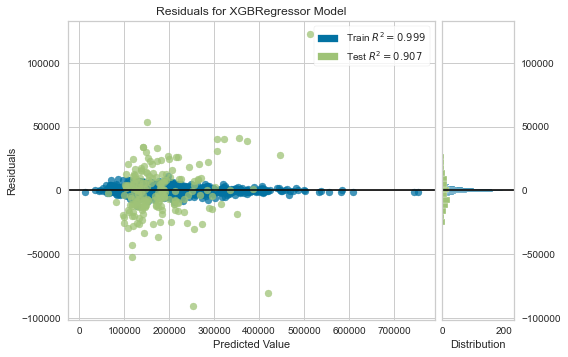

In [81]:
#Modele 4: Model Regresji Liniowej, Model Lasso Ridge, Model Lasów Losowych, Model XGBoost

models = []
predicts = []
names=[]
models.append(('LR', make_pipeline(preprocessor, linear_model.LinearRegression()) ))
models.append(('Lasso Ridge',make_pipeline(preprocessor,linear_model.Ridge(alpha=1.0)) ))
models.append(('Random Forrest',make_pipeline(preprocessor,RandomForestRegressor(n_estimators = 100, random_state = 0)) ))
models.append(('XG Boost',make_pipeline(preprocessor,XGBRegressor(min_samples_leaf=10))))
r2_list = []
MSE_list = []
MAE_list = []
i=0

for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    predicts.append(model.predict(X_test))
    names.append(name)
    r2_list.append(r2_score(y_test,model.predict(X_test)))
    MSE_list.append(mean_squared_error(y_test,model.predict(X_test)))
    MAE_list.append(mean_absolute_error(y_test,model.predict(X_test)))
    print(r2_list[i])
    print(MAE_list[i])
    print(MSE_list[i])
    print("----------")
    
    visualizer = ResidualsPlot(model, hist=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    i=i+1
    


In [84]:
for i in range(len(MSE_list)):
    MSE_list[i] = format(MSE_list[i], 'f')

In [85]:
MSE_list

['19246024803913478573903224766464.000000',
 '333763447.000000',
 '330123055.000000',
 '440269201.000000']

In [91]:
for i in range(len(MAE_list)):
    MAE_list[i] = format(MAE_list[i], 'f')

In [94]:
for i in range(len(r2_list)):
    r2_list[i] = format(r2_list[i], 'f')

ValueError: Unknown format code 'f' for object of type 'str'

# Wyniki modeli przykładowych
1. Najgorzej wypada Model Regresji liniowej
2. Modele Lasso Ridge i Random Forest mają zblizone R2
3. Najlepsze Mae i MSE ma Random Forest i to jest kandydat do najlepszego modelu

In [96]:
import pandas as pd
d = {'R2': r2_list, 
     'MAE': MAE_list,
     'MSE' : MSE_list
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Model', value=['LinearRegression','LassoRidge','RandomForestRegressor','XGBClassifier'])
df

,Model,R2,MAE,MSE
0,LinearRegression,-4046480533849493733376.000000,387822851173505.187500,19246024803913478573903224766464.000000
1,LassoRidge,0.930000,14530.160000,333763447.000000
2,RandomForestRegressor,0.930000,12824.780000,330123055.000000
3,XGBClassifier,0.910000,14592.140000,440269201.000000


# Optymalizacja modeli

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
scoring = 'neg_mean_absolute_error'
LinReg_opt = GridSearchCV(make_pipeline(preprocessor,PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2,3,4,5]},
                    cv=5,
                    scoring  = scoring,
                    refit=True)

LassoReg_opt = GridSearchCV(make_pipeline(preprocessor,PolynomialFeatures(degree=2), Lasso()),
                    param_grid={'polynomialfeatures__degree': [1,2,3],
                               'lasso__alpha': [0.001, 0.1, 1, 10, 1000]
                               },
                    cv=5,
                    scoring  = scoring,
                    refit=True)

RF_opt = GridSearchCV(make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100)),
                    param_grid={'randomforestregressor__min_samples_leaf': [5,10,15,25,50]
                               },
                    cv=5,
                    scoring  = scoring,
                    refit=True)

xgboost_opt = GridSearchCV(make_pipeline(preprocessor, XGBRegressor()),
                    param_grid={'xgbregressor__min_samples_leaf': [5,10,15,25,50]},
                               
                    cv=4,
                    scoring  = scoring,
                    refit=True)


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 29.2 GiB for an array with shape (1354, 2895620) and data type float64

  FitFailedWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 29.2 GiB for an array with shape (1354, 2895620) and data type float64

  FitFailedWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

0.9208384392946262
14791.326719940436
376511229.47643334
----------


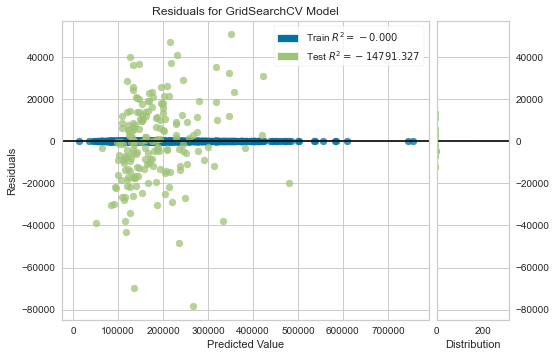

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114674391556.74329, tolerance: 841652188.0007534
  positive)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89818401035.86377, tolerance: 840119441.39285
  positive)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207379403188.13586, tolerance: 856353092.0257746
  positive)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descen

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30842330263.429077, tolerance: 840119441.39285
  positive)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18285492434.438232, tolerance: 856353092.0257746
  positive)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4492818294.646179, tolerance: 882819086.9472175
  positive)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descen

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 29.2 GiB for an array with shape (1354, 2895620) and data type float64

  FitFailedWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 29.2 GiB for an array with shape (1354, 2895620) and data type float64

  FitFailedWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

0.9133150391018404
14957.71679849801
412294311.9622833
----------


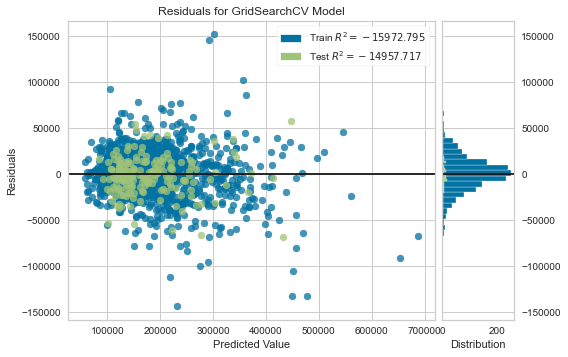

0.9316153202825801
13172.566604673986
325253817.7409891
----------


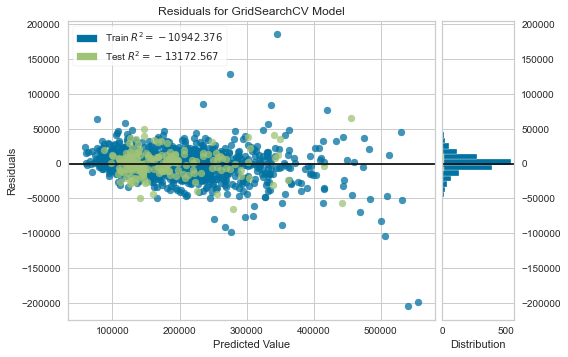

[04:56:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:56:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:56:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are onl

0.9074333131763738
14592.144634589948
440269200.7834243
----------


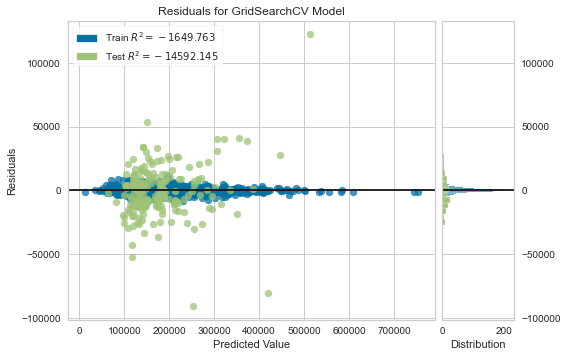

In [100]:
models = [LinReg_opt,LassoReg_opt,RF_opt,xgboost_opt]
r2_list = []
MSE_list = []
MAE_list = []

i=0

for model in models:
 
    model.fit(X_train,y_train)
    r2_list.append(r2_score(y_test,model.predict(X_test)))
    MSE_list.append(mean_squared_error(y_test,model.predict(X_test)))
    MAE_list.append(mean_absolute_error(y_test,model.predict(X_test)))
    print(r2_list[i])
    print(MAE_list[i])
    print(MSE_list[i])
    print("----------")
    
    visualizer = ResidualsPlot(model, hist=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    i=i+1
    

In [606]:
#r2_list =  [round(x,2) for x in r2_list] 
#MAE_list =  [round(x,2) for x in MAE_list] 

In [102]:
for i in range(len(MSE_list)):
    MSE_list[i] = format(MSE_list[i], 'f')

# Ostateczne wyniki po optymalizacji

In [ ]:
# Najlepszy model - Random Forest podkazdym wzgledem
# Dugimodelregresji

In [103]:
#Tabela
import pandas as pd
d = {'R2': r2_list, 
     'MSE': MSE_list,
     'MAE' : MAE_list
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Model', value=['LinearRegression','Lasso_Ridge','RandomForestRegressor','XGBClassifier'])
df

,Model,R2,MSE,MAE
0,LinearRegression,0.920838,376511229.476433,14791.326720
1,Lasso_Ridge,0.913315,412294311.962283,14957.716798
2,RandomForestRegressor,0.931615,325253817.740989,13172.566605
3,XGBClassifier,0.907433,440269200.783424,14592.144635
